# Anime Data Analysis
This notebook performs **exploratory data analysis (EDA)** on an anime dataset using **scatter plots, bar plot, and other visualizations**.

In [194]:
import pandas as pd
import numpy as np

# loading the dataset into a pandas dataframe
df=pd.read_csv('anime.csv')

##  Data Cleaning  

### **1. Overview**  
Data cleaning is a crucial step in data preprocessing to ensure accuracy and consistency. The key steps include:  

### **2. Steps for Data Cleaning**  
- **Load the dataset** and inspect its structure.  
- **Handle missing values** using imputation (e.g., mean, median, mode) or removal techniques.  
- **Identify and remove duplicates** to avoid redundant data.  
- **Detect and treat outliers** using statistical methods (e.g., z-score, IQR).  
- **Standardize categorical values** by fixing typos, formatting inconsistencies, or mapping values correctly.  


In [195]:
# Inspecting the structure of the dataset
df.head()

id                             Title      Votes            Status Types  \
0   5114  Fullmetal Alchemist: Brotherhood  1846307.0   finished_airing    tv   
1  11061            Hunter x Hunter (2011)  1488156.0   finished_airing    tv   
2   9253                       Steins;Gate  1240087.0   finished_airing    tv   
3     21                         One Piece  1076776.0  currently_airing    tv   
4   1535                        Death Note  2426765.0   finished_airing    tv   

   Episodes  Score        Source    Members  Popularity  Favourites Rating  \
0      64.0   9.14         manga  2897486.0         3.0    202552.0      r   
1     148.0   9.05         manga  2387337.0        10.0    182740.0  pg_13   
2      24.0   9.08  visual_novel  2248209.0        13.0    171579.0  pg_13   
3       NaN   8.65         manga  1893379.0        26.0    167571.0  pg_13   
4      37.0   8.62         manga  3421349.0         2.0    155891.0      r   

     Year  Season                                             Genres  \
0  2009.0  spring  ['Action', 'Adventure', 'Drama', 'Fantasy', 'M...   
1  2011.0    fall      ['Action', 'Adventure', 'Fantasy', 'Shounen']   
2  2011.0  spring  ['Drama', 'Psychological', 'Sci-Fi', 'Suspense...   
3  1999.0    fall      ['Action', 'Adventure', 'Fantasy', 'Shounen']   
4  2006.0    fall  ['Psychological', 'Shounen', 'Supernatural', '...   

                       Studios  
0                    ['Bones']  
1  ['Madhouse', 'Studio Live']  
2                ['White Fox']  
3           ['Toei Animation']  
4                 ['Madhouse']

In [196]:
# Inspecting the structure of the dataset
df.sample(5)

id                       Title    Votes           Status  Types  \
23409  43249           Si Zhi Xiao Ye Ya      7.0  finished_airing  movie   
22126  36821                  Machibouke     58.0  finished_airing  music   
10761  31691  San Mao Liu Lang Ji (2006)     69.0  finished_airing     tv   
274     2246                    Mononoke  79414.0  finished_airing     tv   
11344   3109                    Mei King    677.0  finished_airing    ova   

       Episodes  Score        Source   Members  Popularity  Favourites Rating  \
23409       1.0    NaN           NaN      40.0     19586.0         NaN      g   
22126       1.0    NaN      original     146.0     17980.0         NaN      g   
10761      25.0    NaN           NaN     235.0     16434.0         2.0      g   
274        12.0   8.43      original  278708.0       709.0      6944.0      r   
11344       4.0   6.01  visual_novel    2112.0      9751.0         1.0     rx   

         Year  Season                                             Genres  \
23409     NaN     NaN                                           ['Kids']   
22126  1973.0  summer                                  ['Kids', 'Music']   
10761     NaN     NaN                   ['Comedy', 'Historical', 'Kids']   
274    2007.0  summer  ['Adult Cast', 'Fantasy', 'Historical', 'Horro...   
11344  1999.0    fall       ['Adventure', 'Comedy', 'Fantasy', 'Hentai']   

                         Studios  
23409                        NaN  
22126                        NaN  
10761                        NaN  
274           ['Toei Animation']  
11344  ['Phoenix Entertainment']

In [197]:
# Inspecting the structure of the dataset
df.info()
df.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24030 entries, 0 to 24029
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          24030 non-null  int64  
 1   Title       24030 non-null  object 
 2   Votes       20244 non-null  float64
 3   Status      24030 non-null  object 
 4   Types       24030 non-null  object 
 5   Episodes    23228 non-null  float64
 6   Score       14171 non-null  float64
 7   Source      20256 non-null  object 
 8   Members     20556 non-null  float64
 9   Popularity  20556 non-null  float64
 10  Favourites  13225 non-null  float64
 11  Rating      23014 non-null  object 
 12  Year        17571 non-null  float64
 13  Season      17571 non-null  object 
 14  Genres      23866 non-null  object 
 15  Studios     13028 non-null  object 
dtypes: float64(7), int64(1), object(8)
memory usage: 2.9+ MB


count          mean            std      min      25%       50%  \
id          24030.0  28444.763296   17188.095342     1.00  9979.50  33732.00   
Votes       20244.0  21807.489824  101926.816741     1.00    79.00    540.00   
Episodes    23228.0     16.436413      50.299240     1.00     1.00      2.00   
Score       14171.0      6.459171       0.901886     1.85     5.85      6.47   
Members     20556.0  41345.954904  165589.361190    17.00   308.00   1764.50   
Popularity  20556.0  10260.542032    5934.084643     1.00  5121.75  10260.50   
Favourites  13225.0    818.982306    6011.800817     1.00     2.00     11.00   
Year        17571.0   2007.439019      13.488141  1917.00  2002.00   2012.00   

                 75%         max  
id          43915.75    52172.00  
Votes        4737.00  2459371.00  
Episodes       14.00     3057.00  
Score           7.11        9.14  
Members     12559.25  3438932.00  
Popularity  15400.25    20538.00  
Favourites     80.00   202552.00  
Year         2017.00     2023.00

In [198]:
# Inspecting the structure of the dataset
print(df.shape)
print(df.columns)
print(df.dtypes)

(24030, 16)
Index(['id', 'Title', 'Votes', 'Status', 'Types', 'Episodes', 'Score',
       'Source', 'Members', 'Popularity', 'Favourites', 'Rating', 'Year',
       'Season', 'Genres', 'Studios'],
      dtype='object')
id              int64
Title          object
Votes         float64
Status         object
Types          object
Episodes      float64
Score         float64
Source         object
Members       float64
Popularity    float64
Favourites    float64
Rating         object
Year          float64
Season         object
Genres         object
Studios        object
dtype: object


In [199]:
# Checking for missing values
df.isnull().sum()

id                0
Title             0
Votes          3786
Status            0
Types             0
Episodes        802
Score          9859
Source         3774
Members        3474
Popularity     3474
Favourites    10805
Rating         1016
Year           6459
Season         6459
Genres          164
Studios       11002
dtype: int64

In [200]:
# Handling the missing values in the dataset
df = df.dropna(subset=['Votes'])

df = df.dropna(subset=['Episodes'])

# replacing the missing values in the Score column
df['Score'] = df['Score'].fillna(df['Score'].median())

# Deleting the missing values in source column
df = df.dropna(subset=['Source'])

# Deleting the missing values int the Members and popularity
df = df.dropna(subset=['Members'])
df = df.dropna(subset=['Popularity'])

# replacing the missing values in the favourites column 
df['Favourites'] = df['Favourites'].fillna(df['Favourites'].median())

# deleting the missing values in the rating column
df = df.dropna(subset=['Rating'])

# replacing the missing values in the Season
df['Season'] = df['Season'].fillna(df['Season'].mode()[0])

# replacing the missing values in the Year column
df['Year'] = df['Year'].fillna(df['Year'].median())


# deleting the missing values in the Genre column 
df = df.dropna(subset=['Genres'])

# deleting the missing values in the studio column
df = df.dropna(subset=['Studios'])


In [201]:
df.shape

(11000, 16)

In [202]:
# Checking for missing values
df.isnull().sum()

id            0
Title         0
Votes         0
Status        0
Types         0
Episodes      0
Score         0
Source        0
Members       0
Popularity    0
Favourites    0
Rating        0
Year          0
Season        0
Genres        0
Studios       0
dtype: int64

In [203]:
# checking for duplicates
df.duplicated().sum()

np.int64(18)

In [204]:
# Removing the duplucates
df.drop_duplicates(inplace=True)

In [205]:
# checking for duplicates
df.duplicated().sum()

np.int64(0)

In [206]:
# detecting outliers 

# Checking for outlier using IQR method
numeric_df = df.select_dtypes(include=[np.number])
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).sum()

id               0
Votes         1648
Episodes       935
Score          181
Members       1626
Popularity     105
Favourites    1892
Year           382
dtype: int64

In [207]:
import numpy as np
from scipy import stats
z = np.abs(stats.zscore(numeric_df))
threshold = 3
outlier_mask = (z > threshold)
outlier_counts = np.sum(outlier_mask, axis=0)
for col, count in zip(numeric_df.columns, outlier_counts):
    print(f"{col}: {count}")


id: 0
Votes: 194
Episodes: 89
Score: 53
Members: 227
Popularity: 0
Favourites: 119
Year: 148


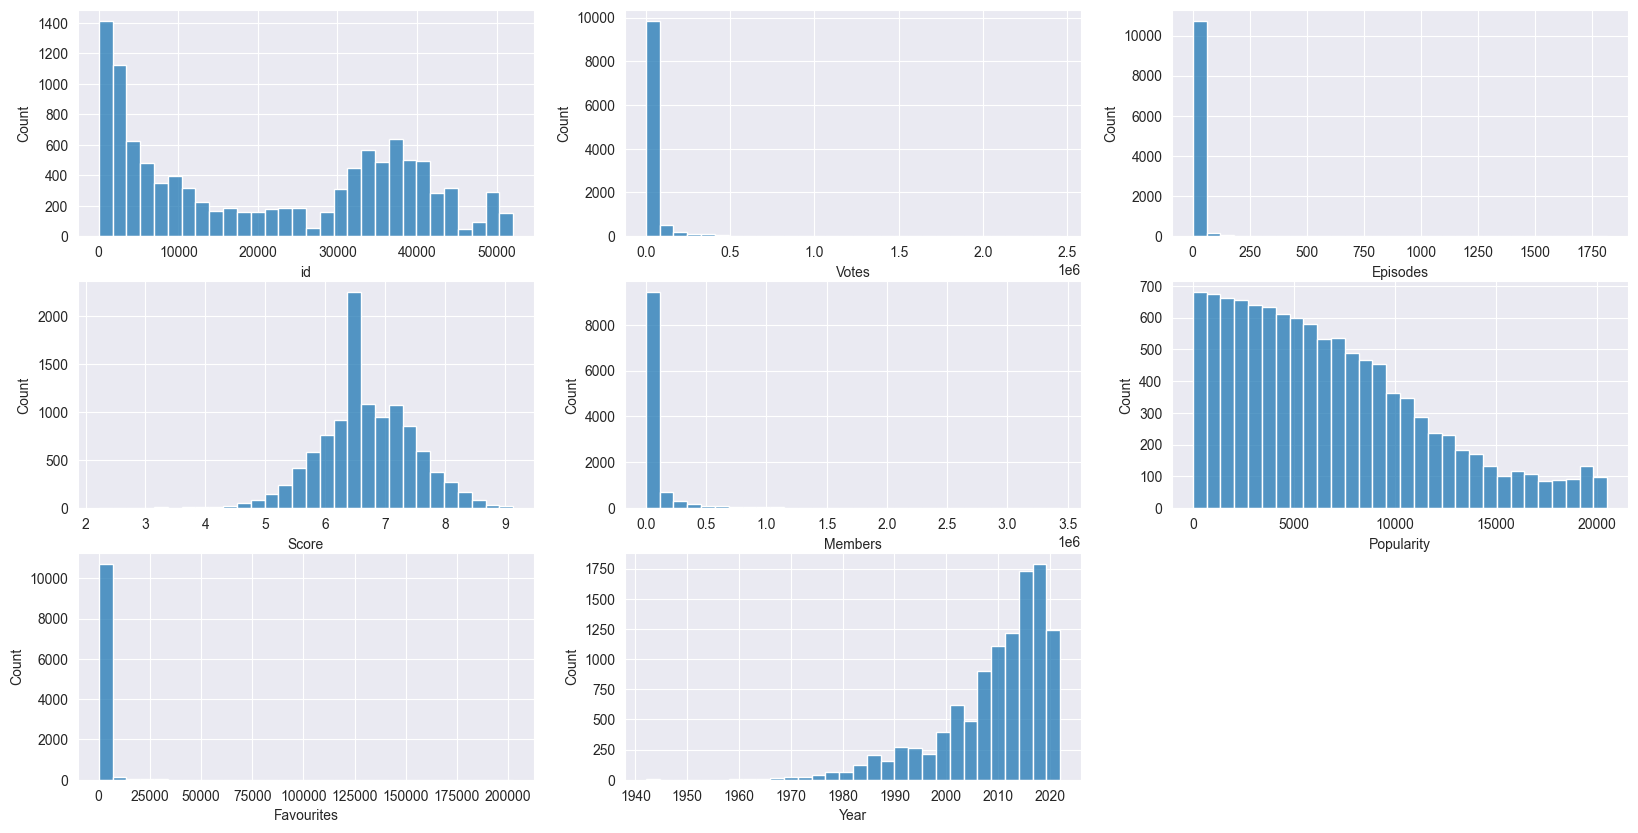

In [208]:
# checking for distribution of data to decide ont the best method  : z-score or IQR
import seaborn as sns
import matplotlib.pyplot as plt

# plot the histogram for each numeric column can you merge the graph do not draw the gra
plt.figure(figsize=(20, 10))
for i, col in enumerate(numeric_df.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(numeric_df[col], bins=30)
    plt.xlabel(col)

In [209]:
# treating the outliers

# removing the outlier except for the Score column using IQR since the data is not normally distributed
for col in numeric_df.columns:
    if col != 'Score':
        Q1 = numeric_df[col].quantile(0.25)
        Q3 = numeric_df[col].quantile(0.75)
        IQR = Q3 - Q1
        df = df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]
df.shape





(7759, 16)

In [210]:
# Treating the outliers in the Score column using the z-score method

# calculating the z-score
z = np.abs(stats.zscore(df['Score']))
threshold = 3
outlier_mask = (z > threshold)
df = df[~outlier_mask]
df.shape


(7719, 16)

In [211]:
# List of columns to be standardized
categorical_columns = ['Title', 'Status', 'Types', 'Source', 'Rating', 'Season', 'Genres', 'Studios']
for col in categorical_columns:
    df[col] = df[col].str.title()

df.head()

id                                              Title    Votes  \
1946     52                         Kidou Tenshi Angelic Layer  27777.0   
1950  49893  Kobayashi-San Chi No Maid Dragon S: Nippon No ...  17131.0   
1952   2354                               Devilman: Tanjou-Hen  14232.0   
1956  39388                                   Koisuru Asteroid  29427.0   
1957  30714                                    Owaranai Seraph  36375.0   

               Status    Types  Episodes  Score        Source  Members  \
1946  Finished_Airing       Tv      26.0   7.26         Manga  54911.0   
1950  Finished_Airing  Special       1.0   7.86         Manga  53468.0   
1952  Finished_Airing      Ova       1.0   7.16         Manga  26664.0   
1956  Finished_Airing       Tv      12.0   6.88  4_Koma_Manga  77198.0   
1957  Finished_Airing  Special       9.0   7.34         Manga  83961.0   

      Popularity  Favourites Rating    Year  Season  \
1946      2532.0       272.0  Pg_13  2001.0  Spring   
1950      2566.0       272.0  Pg_13  2022.0  Winter   
1952      3708.0       271.0     R+  1987.0    Fall   
1956      2069.0       271.0  Pg_13  2020.0  Winter   
1957      1973.0       271.0  Pg_13  2015.0  Spring   

                                                 Genres              Studios  
1946  ['Comedy', 'Drama', 'Sci-Fi', 'Shounen', 'Spor...            ['Bones']  
1950                       ['Fantasy', 'Slice Of Life']  ['Kyoto Animation']  
1952  ['Horror', 'Mythology', 'Sci-Fi', 'Supernatural']   ['Oh! Production']  
1956  ['Cgdct', 'Comedy', 'Iyashikei', 'School', 'Sl...        ['Doga Kobo']  
1957  ['Comedy', 'Detective', 'Shounen', 'Supernatur...       ['Wit Studio']

# Univariate Analysis (Single-Variable Exploration)  

##  Overview  
Univariate analysis focuses on examining the distribution and characteristics of a single variable at a time.  

## Key Steps  

### **1. Summary Statistics**  
- **Measures of Central Tendency**: Mean, Median, Mode  
- **Measures of Dispersion**: Variance, Standard Deviation, Range  
- **Shape of Distribution**: Skewness, Kurtosis  

### **2. Frequency Distributions**  
- Analyze categorical variables using frequency tables and bar charts.  
- Identify the most common and least common categories.  

###  **3. Visualization Techniques**  
- ** Histograms** – Understand the distribution of numerical variables.  
- ** Box Plots** – Detect outliers and analyze data spread.  

> **Tip:** Use statistical libraries like `pandas`, `matplotlib`, and `seaborn` for efficient analysis and visualization!  



                    mean       50%      variance   skewness
id          21071.657075  19583.00  2.733783e+08   0.151232
Votes       37616.707977   3394.50  1.573373e+10   7.901659
Episodes       12.555454      3.00  1.252887e+03  27.367545
Score           6.693984      6.61  6.050046e-01  -0.122876
Members     72218.472865   8958.50  4.249974e+10   6.494500
Popularity   6737.292296   5862.50  2.372206e+07   0.794468
Favourites    849.576125     16.00  3.296195e+07  17.982151
Year         2009.261337   2013.00  1.138312e+02  -1.448615


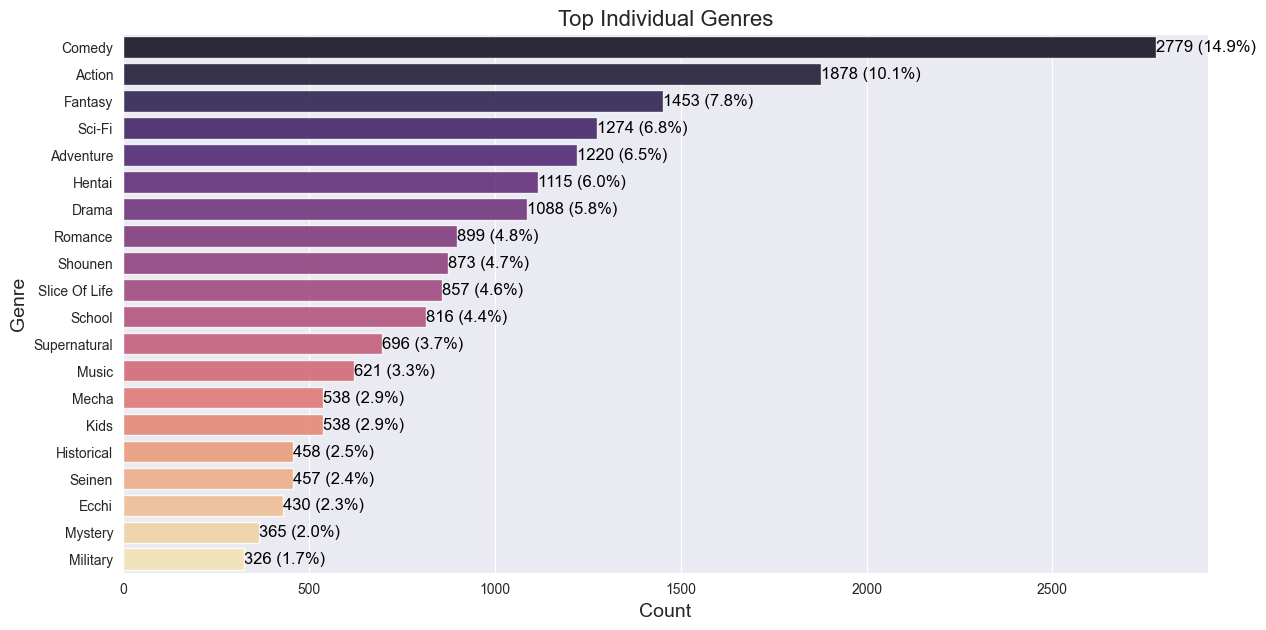

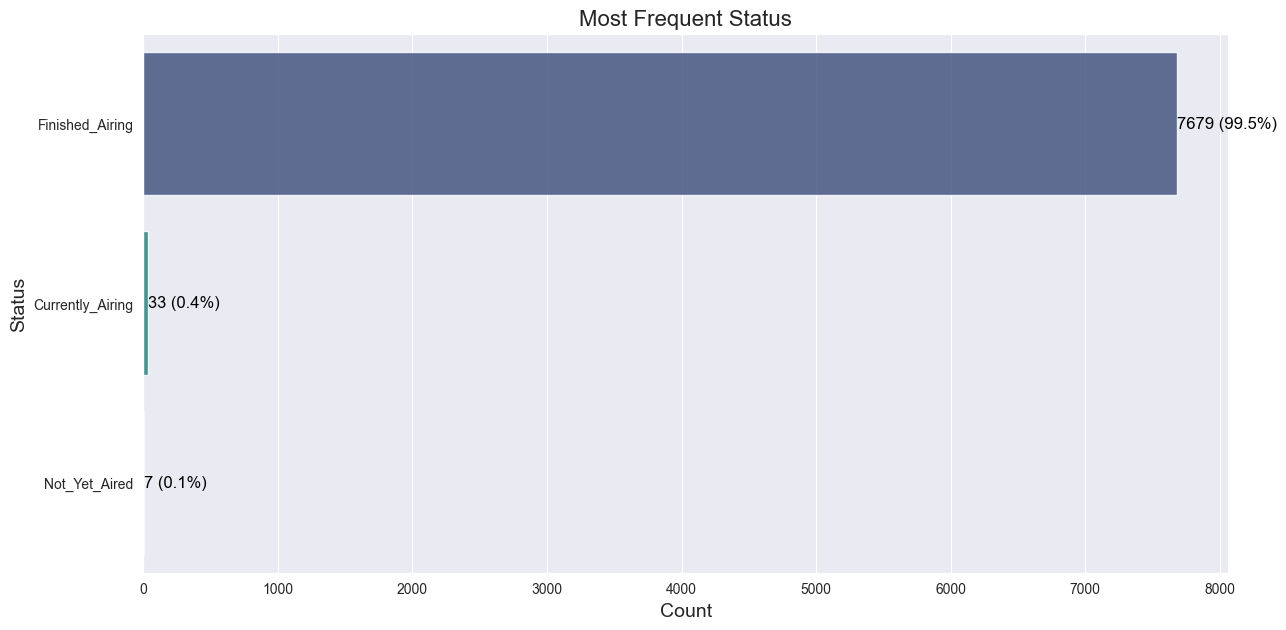

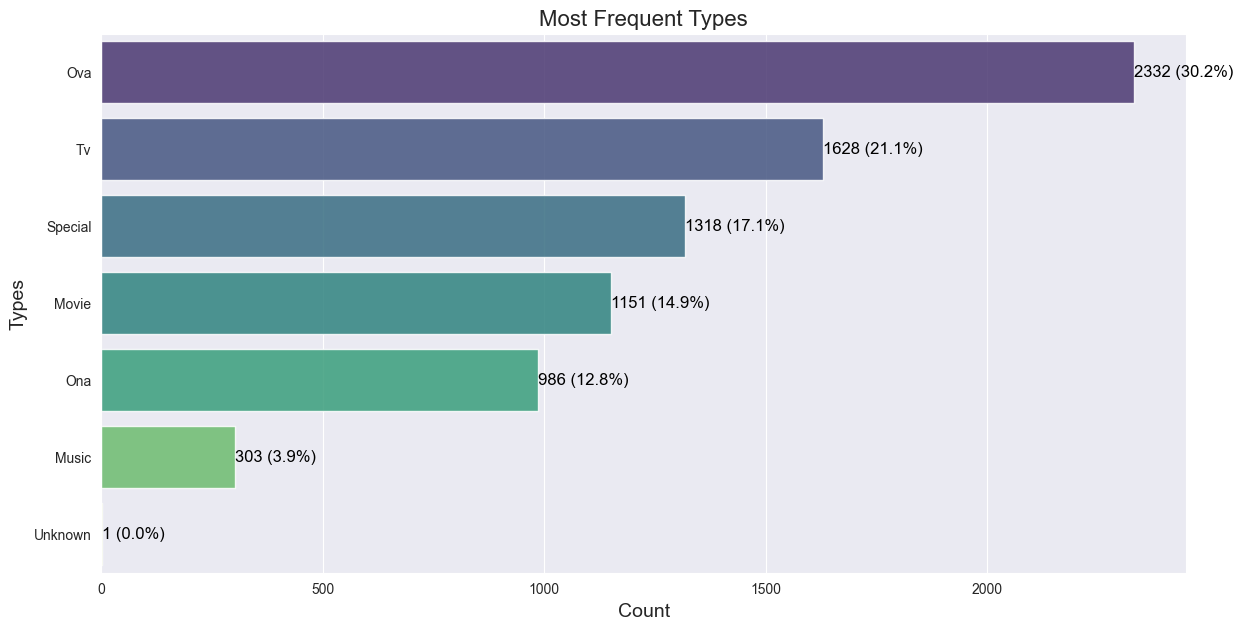

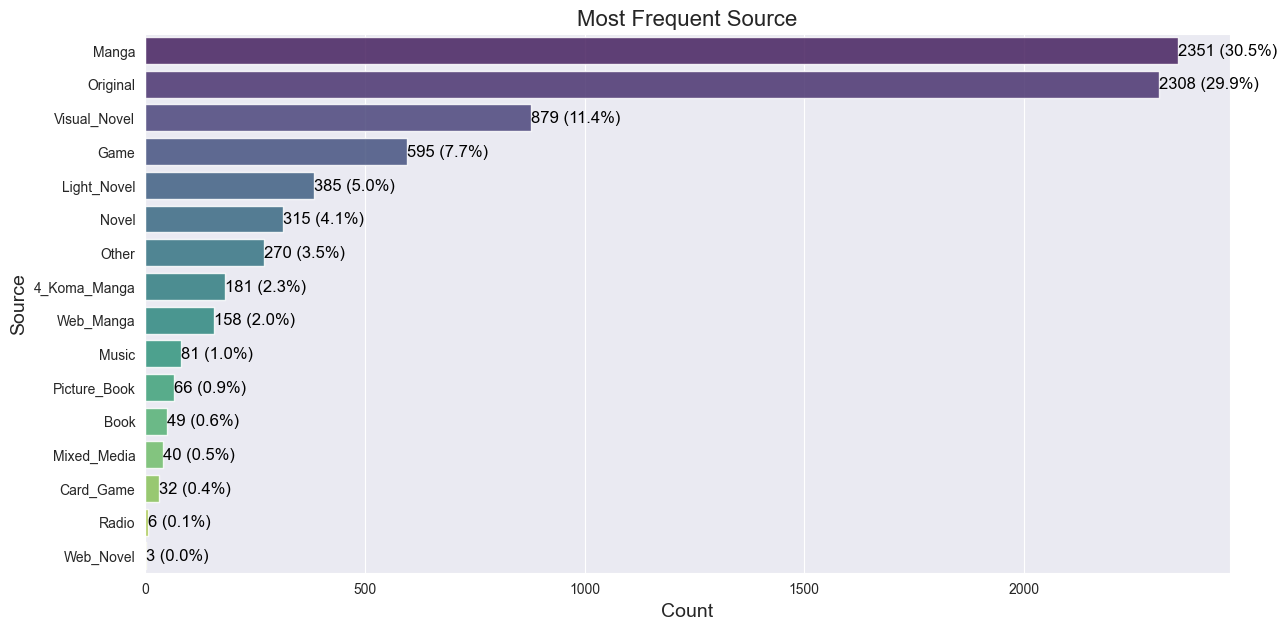

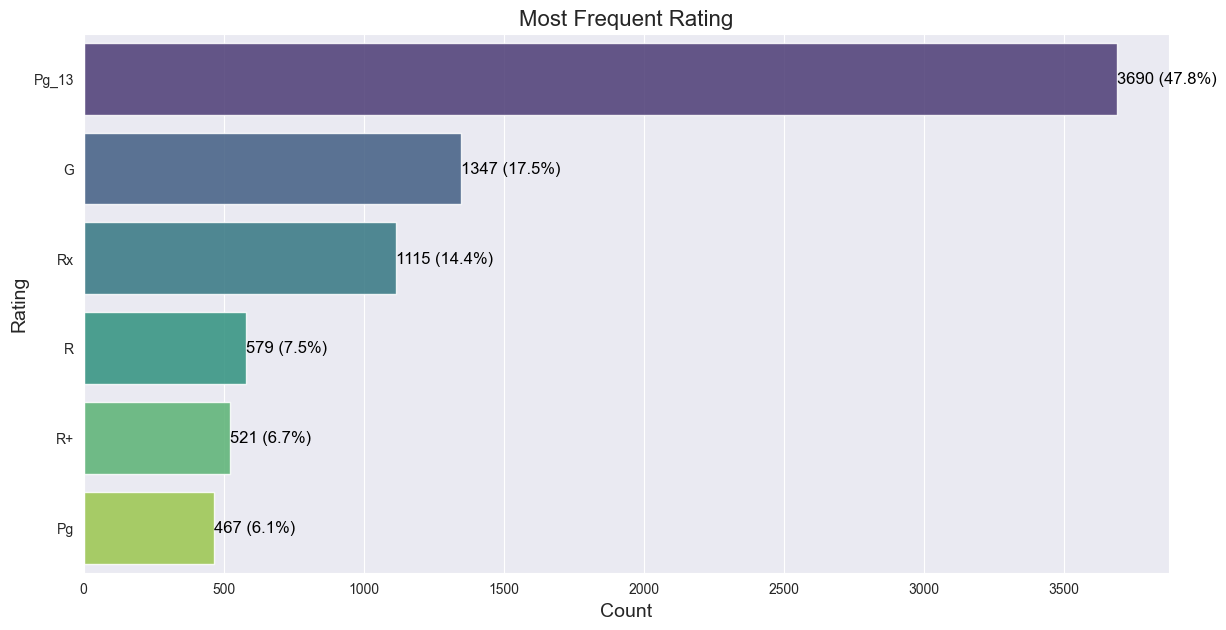

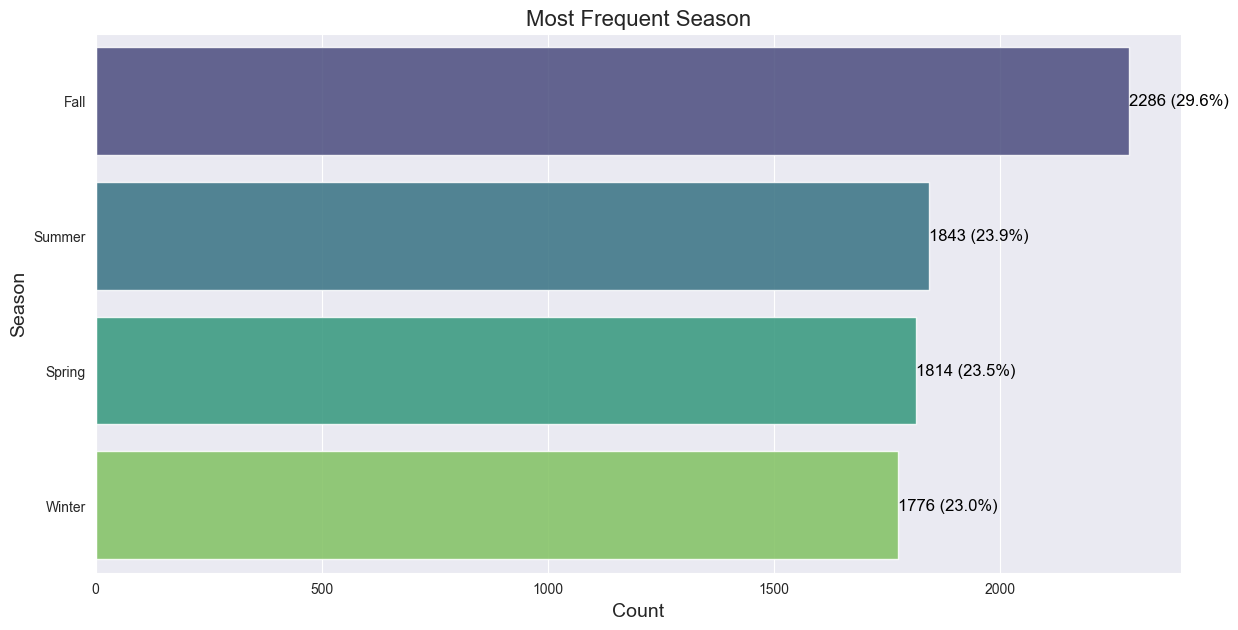

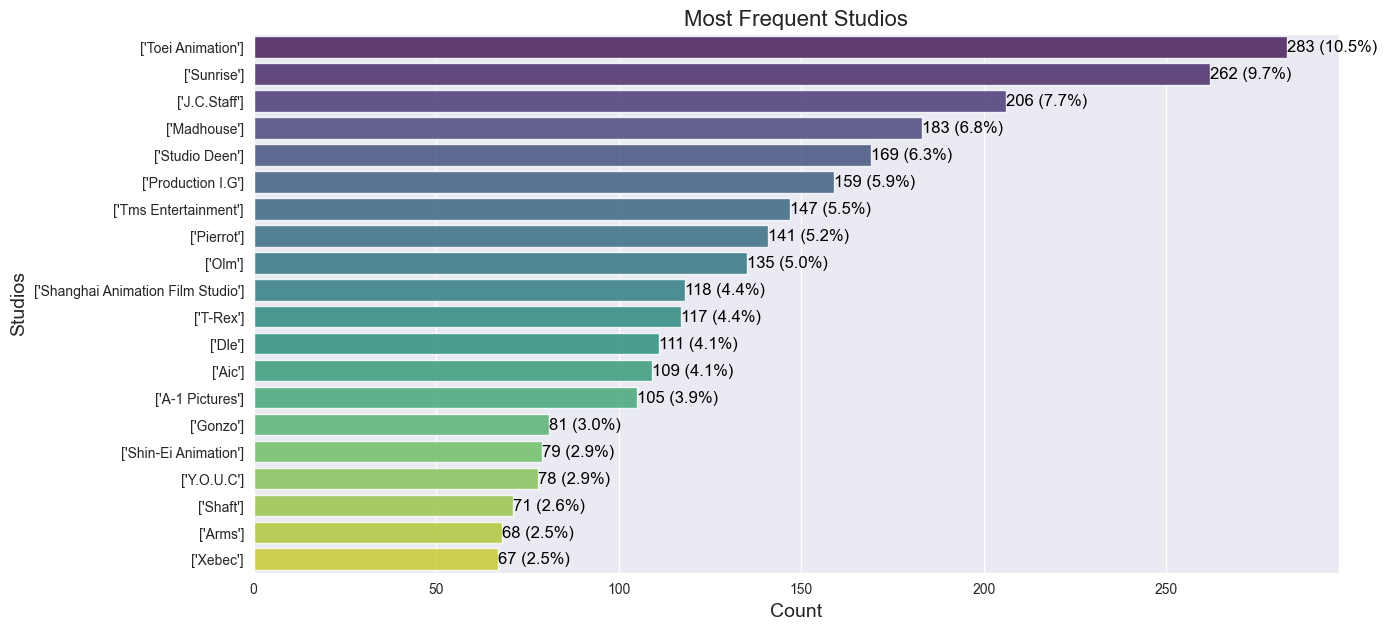

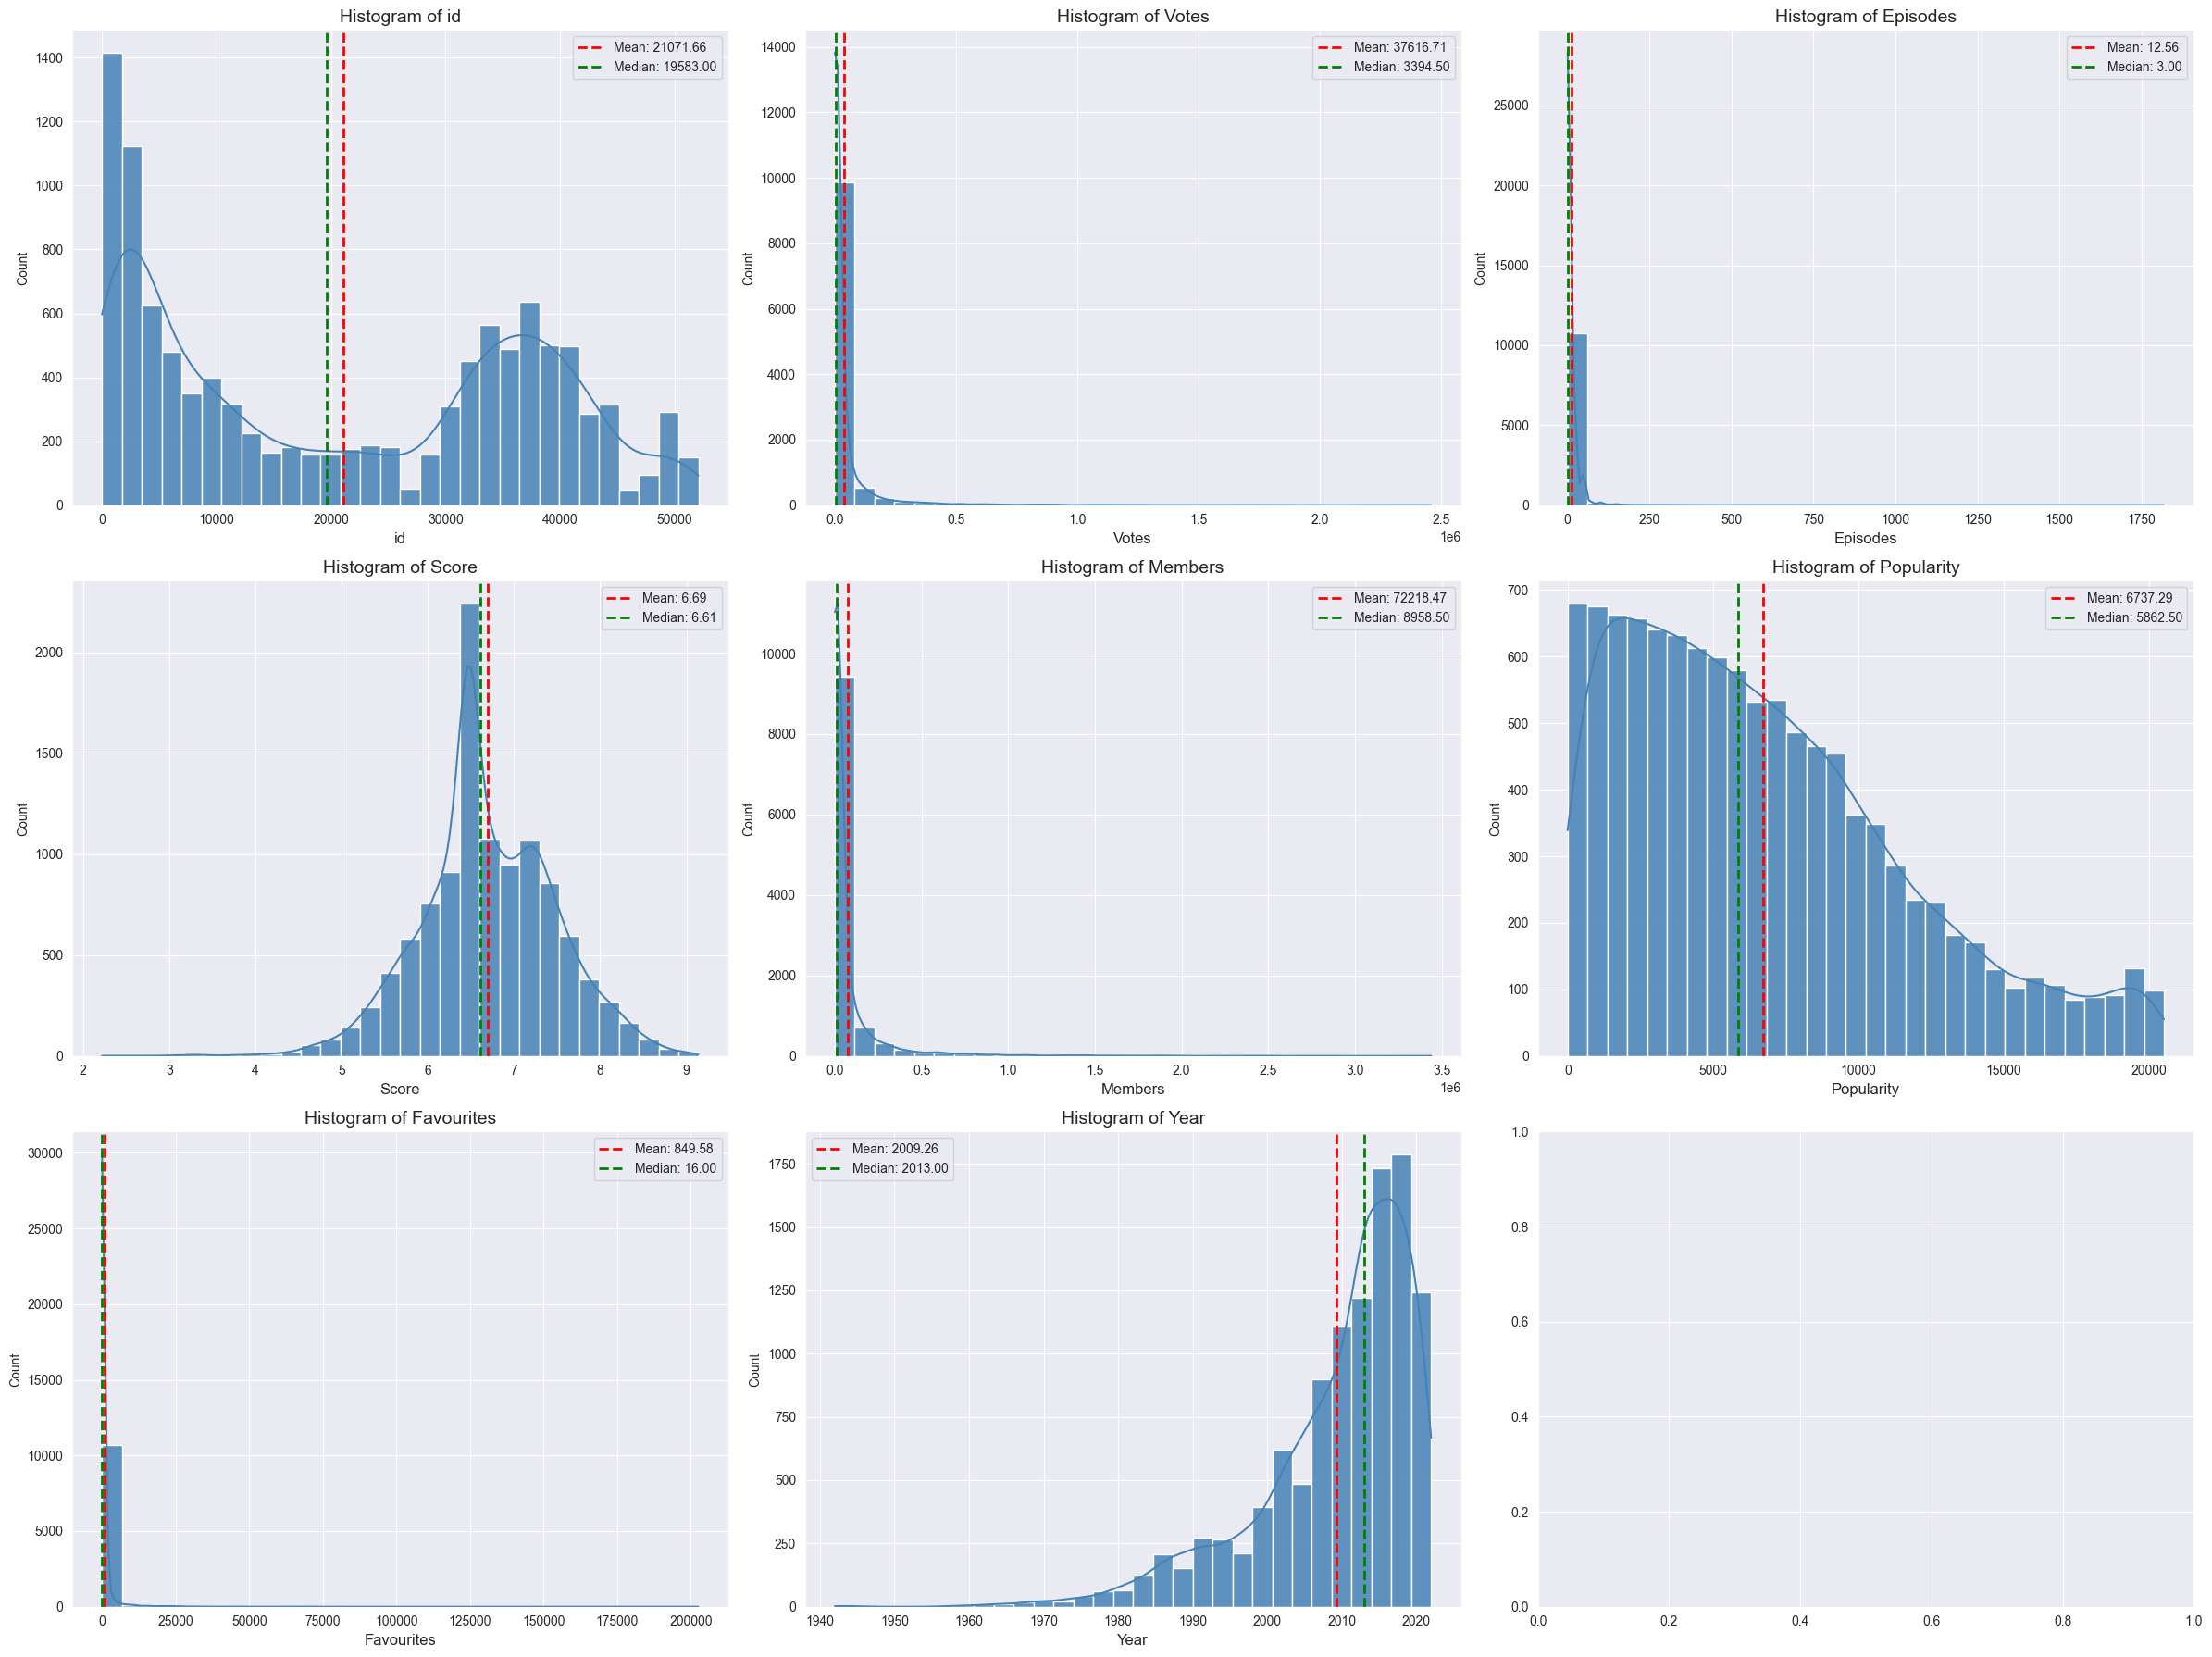

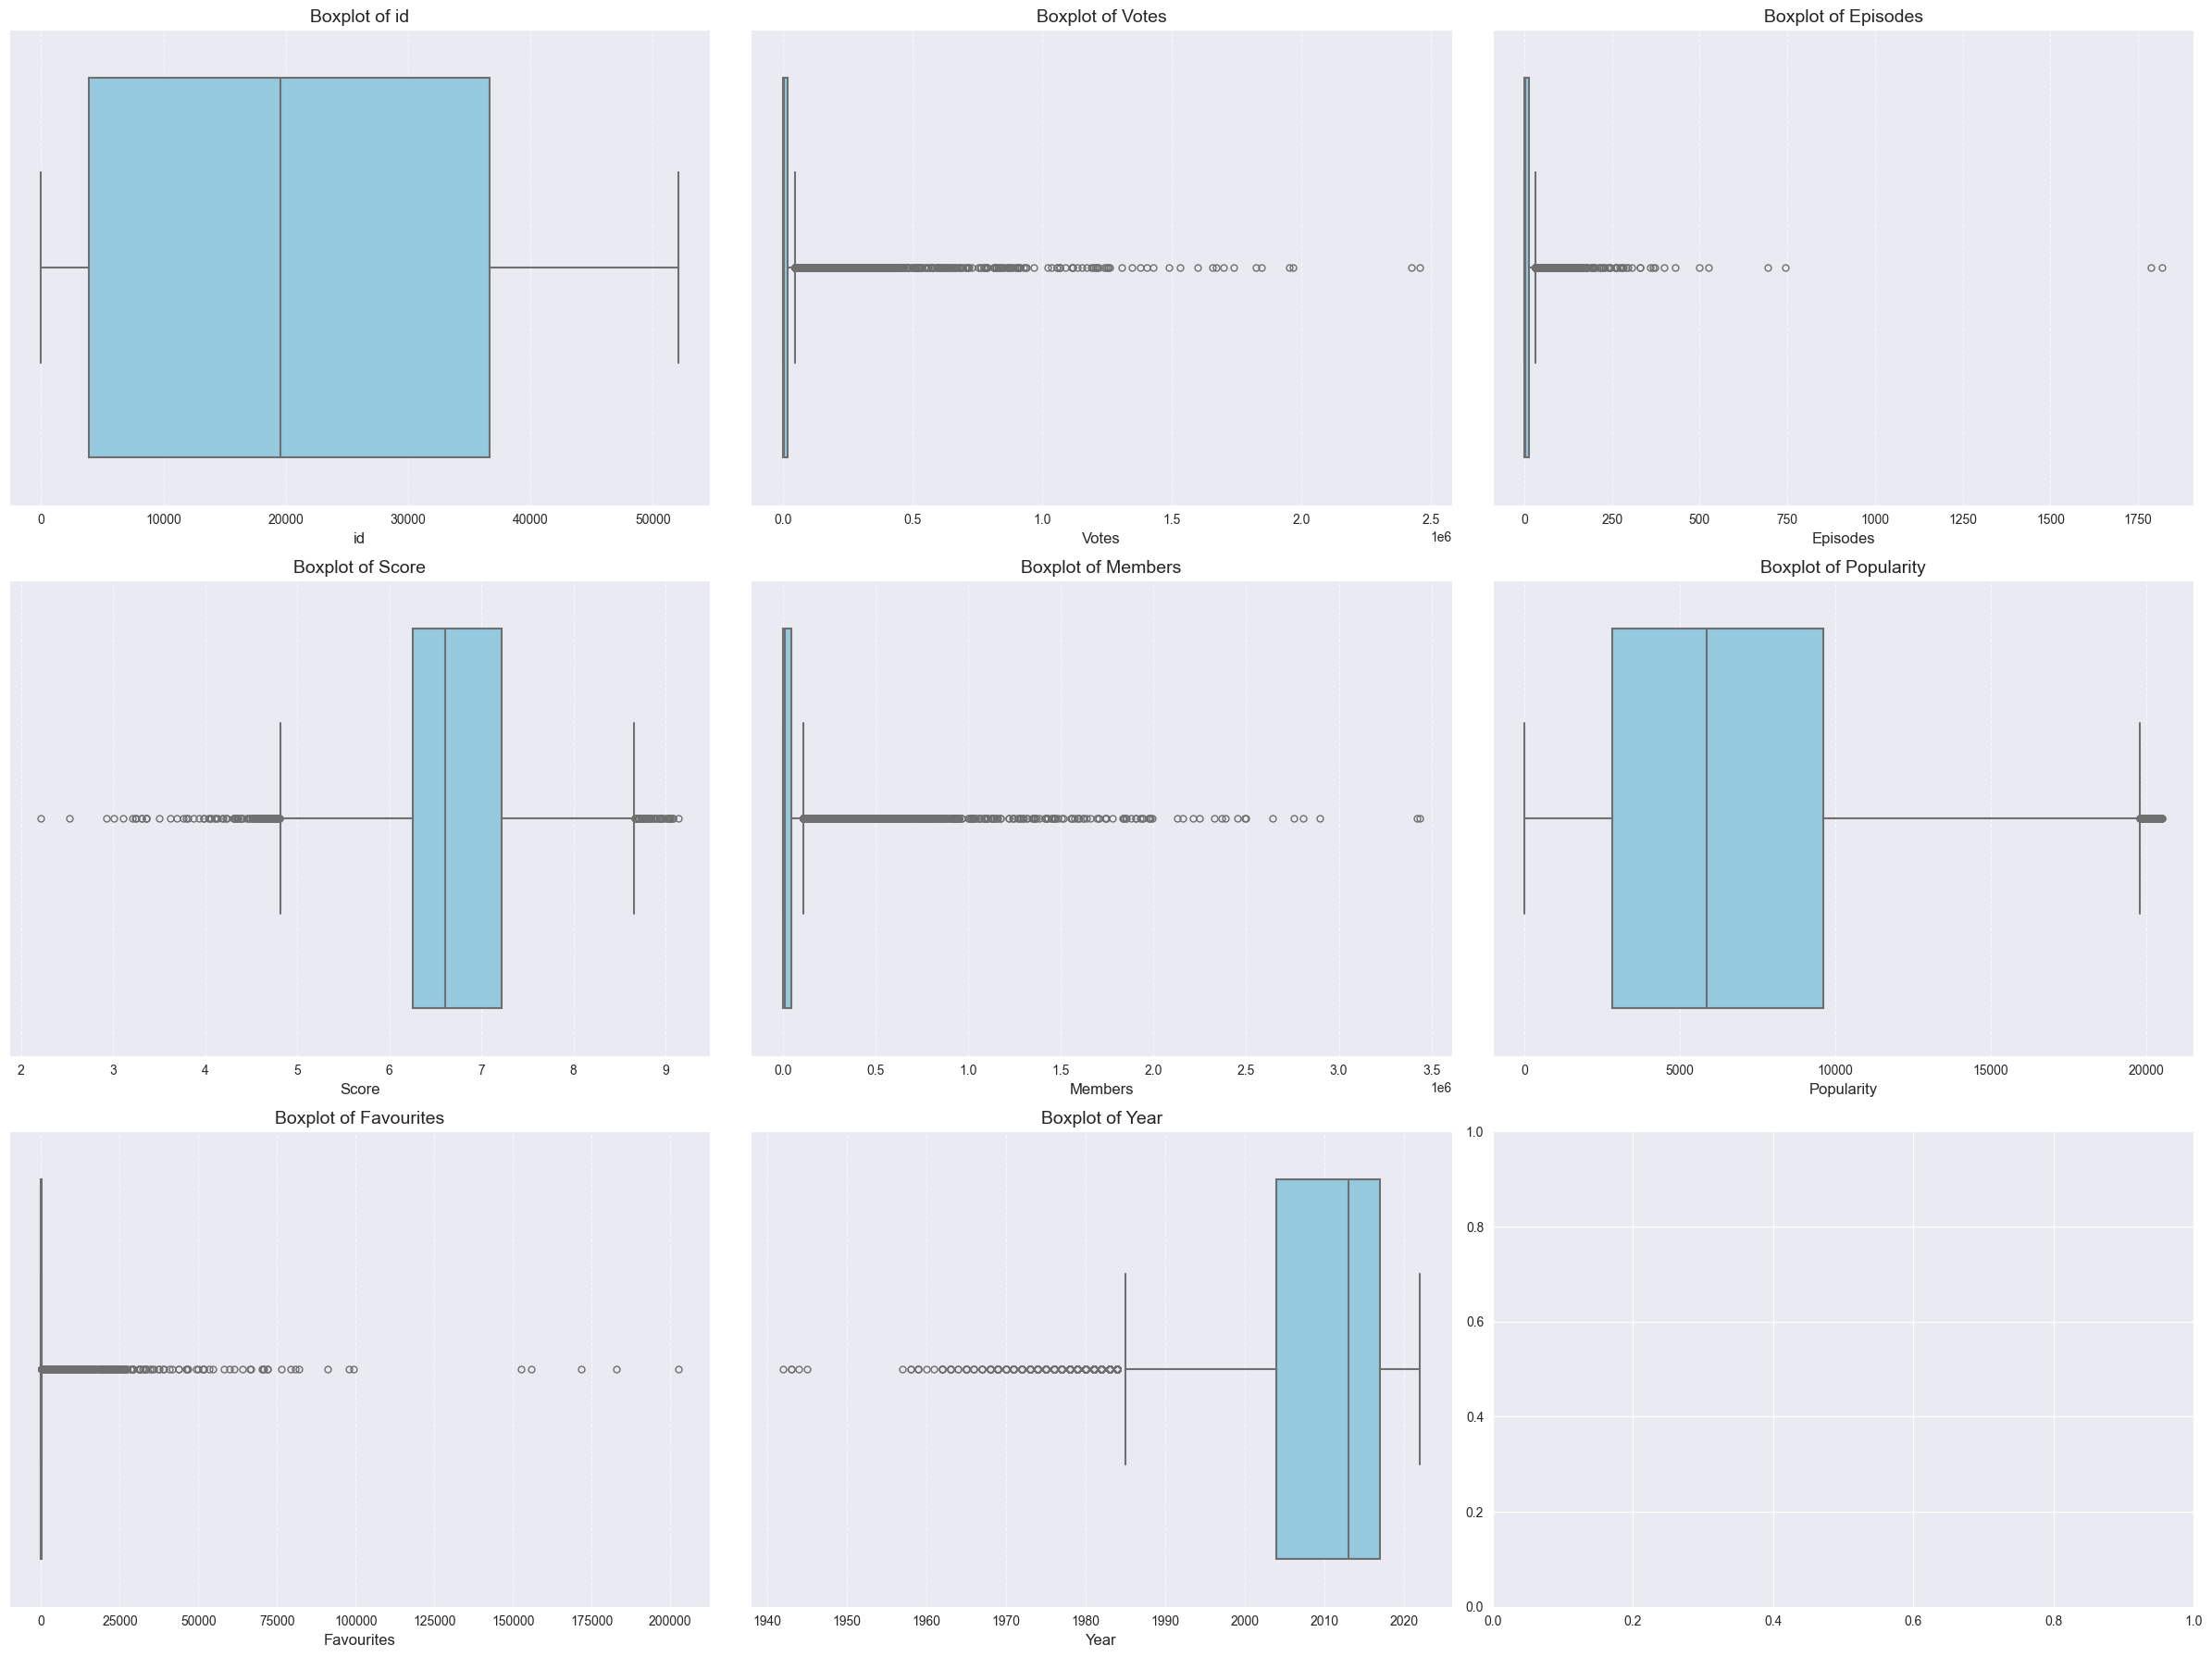

In [212]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import ast
import numpy as np
from collections import Counter

# Ignore warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Set Seaborn style for improved visuals
sns.set_style("darkgrid")

# === Summary Statistics ===
numeric_summary = numeric_df.describe().T
numeric_summary['variance'] = numeric_df.var()
numeric_summary['skewness'] = numeric_df.skew()
print(numeric_summary[['mean', '50%', 'variance', 'skewness']])

# === Categorical Data Visualization ===
# 1. Plot Frequency Distribution of 'Genres' Column
genre_counts = Counter()
df['Genres'].dropna().apply(lambda x: genre_counts.update(ast.literal_eval(x)))

# Convert to pandas series and take top 20 if needed
genre_series = pd.Series(genre_counts).sort_values(ascending=False)
if len(genre_series) > 20:
    genre_series = genre_series.head(20)

plt.figure(figsize=(14, 7))
ax = sns.barplot(x=genre_series.values, y=genre_series.index, palette='magma', alpha=0.85)
plt.title("Top Individual Genres", fontsize=16)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Genre", fontsize=14)

# Annotate count & percentage values
total = genre_series.sum()
for p in ax.patches:
    count = int(p.get_width())
    percentage = f"{(count / total) * 100:.1f}%"
    ax.annotate(f"{count} ({percentage})", 
                (p.get_width(), p.get_y() + p.get_height() / 2), 
                ha='left', va='center', fontsize=12, color='black')

plt.show()

# 2. Plot Frequency Distributions for Other Categorical Columns
for col in categorical_columns:
    if col not in ['Title', 'Genres'] and col in df.columns:
        value_counts = df[col].value_counts()

        # Plot all if <= 20 unique values, else plot top 20
        if len(value_counts) > 20:
            value_counts = value_counts.head(20)

        plt.figure(figsize=(14, 7))
        ax = sns.barplot(x=value_counts.values, y=value_counts.index, palette='viridis', alpha=0.85)
        plt.title(f"Most Frequent {col}", fontsize=16)
        plt.xlabel("Count", fontsize=14)
        plt.ylabel(col, fontsize=14)

        # Annotate count & percentage values
        total = value_counts.sum()
        for p in ax.patches:
            count = int(p.get_width())
            percentage = f"{(count / total) * 100:.1f}%"
            ax.annotate(f"{count} ({percentage})", 
                        (p.get_width(), p.get_y() + p.get_height() / 2), 
                        ha='left', va='center', fontsize=12, color='black')

        plt.show()

# === Numerical Data Visualization ===
num_cols = numeric_df.shape[1]
rows = (num_cols // 3) + (num_cols % 3 > 0)  # Adjust rows dynamically

# 1. Histograms for Numeric Columns with Mean & Median
fig, axes = plt.subplots(rows, min(3, num_cols), figsize=(24, rows * 6))
axes = axes.flatten()

for i, col in enumerate(numeric_df.columns):
    sns.histplot(numeric_df[col], bins=30, kde=True, ax=axes[i], color='steelblue', alpha=0.85)
    
    # Add mean & median lines
    mean_value = numeric_df[col].mean()
    median_value = numeric_df[col].median()
    axes[i].axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
    axes[i].axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')
    
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_title(f"Histogram of {col}", fontsize=14)
    axes[i].legend()

plt.tight_layout()
plt.show()

# 2. Box Plots for Numeric Columns with Outliers
fig, axes = plt.subplots(rows, min(3, num_cols), figsize=(24, rows * 6))
axes = axes.flatten()

for i, col in enumerate(numeric_df.columns):
    sns.boxplot(x=numeric_df[col], ax=axes[i], color='skyblue', fliersize=5, linewidth=1.5)
    
    # Add gridlines for readability
    axes[i].grid(axis='x', linestyle='--', alpha=0.7)
    
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_title(f"Boxplot of {col}", fontsize=14)

plt.tight_layout()
plt.show()


# Bivariate Analysis (Two-Variable Exploration)  

##  Overview  
Bivariate analysis examines the relationship between two variables to identify patterns, dependencies, or trends.  

##  Key Techniques  

### **1. Correlation Analysis**  
- Use a **correlation matrix** to measure relationships between numerical variables.    
- Visualize correlations using a **heatmap**.  

### **2. Continuous Variable Relationships**  
-  Scatter Plots – Show trends and strength of relationships between two numerical variables.   

### 3.  Categorical vs. Numerical Comparisons   
- Bar Plots – Compare mean or count distributions across categories.  
- Violin Plots  – Display data distribution and density variations.  
- Box Plots  – Highlight outliers and compare spread across categories.  

>  **Tip:** Use `seaborn` and `matplotlib` for advanced visualizations in Python!  



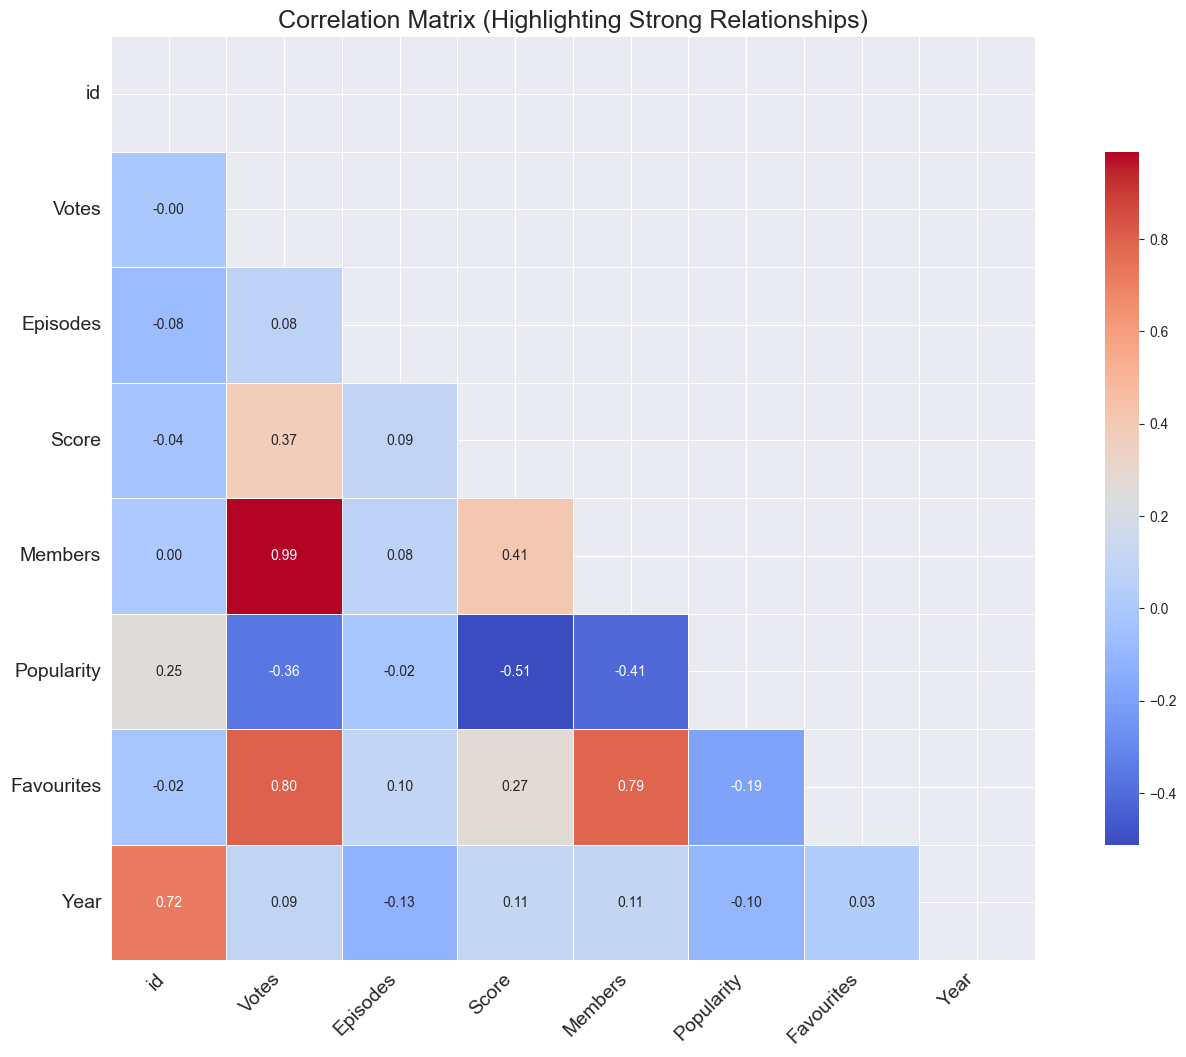

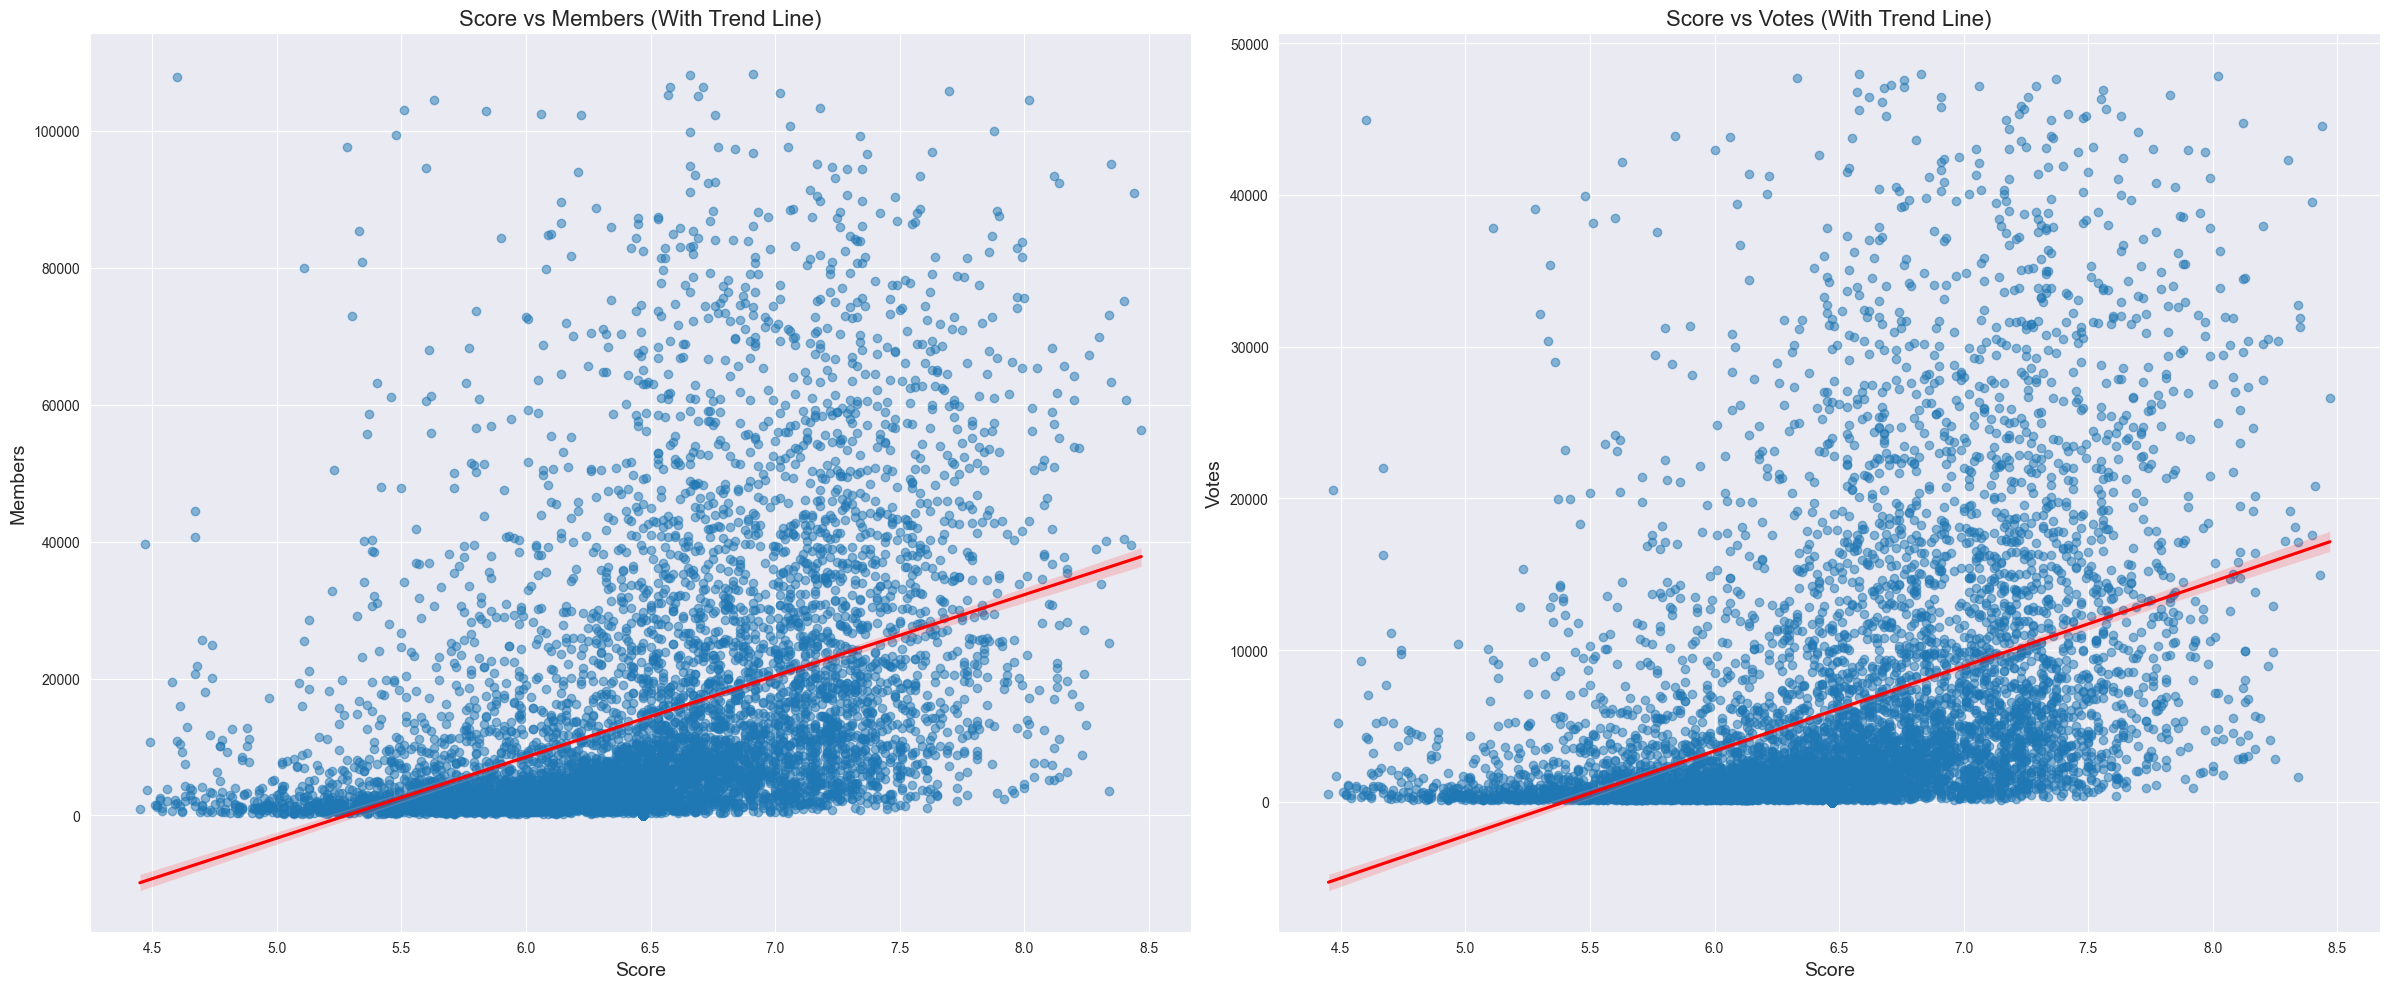

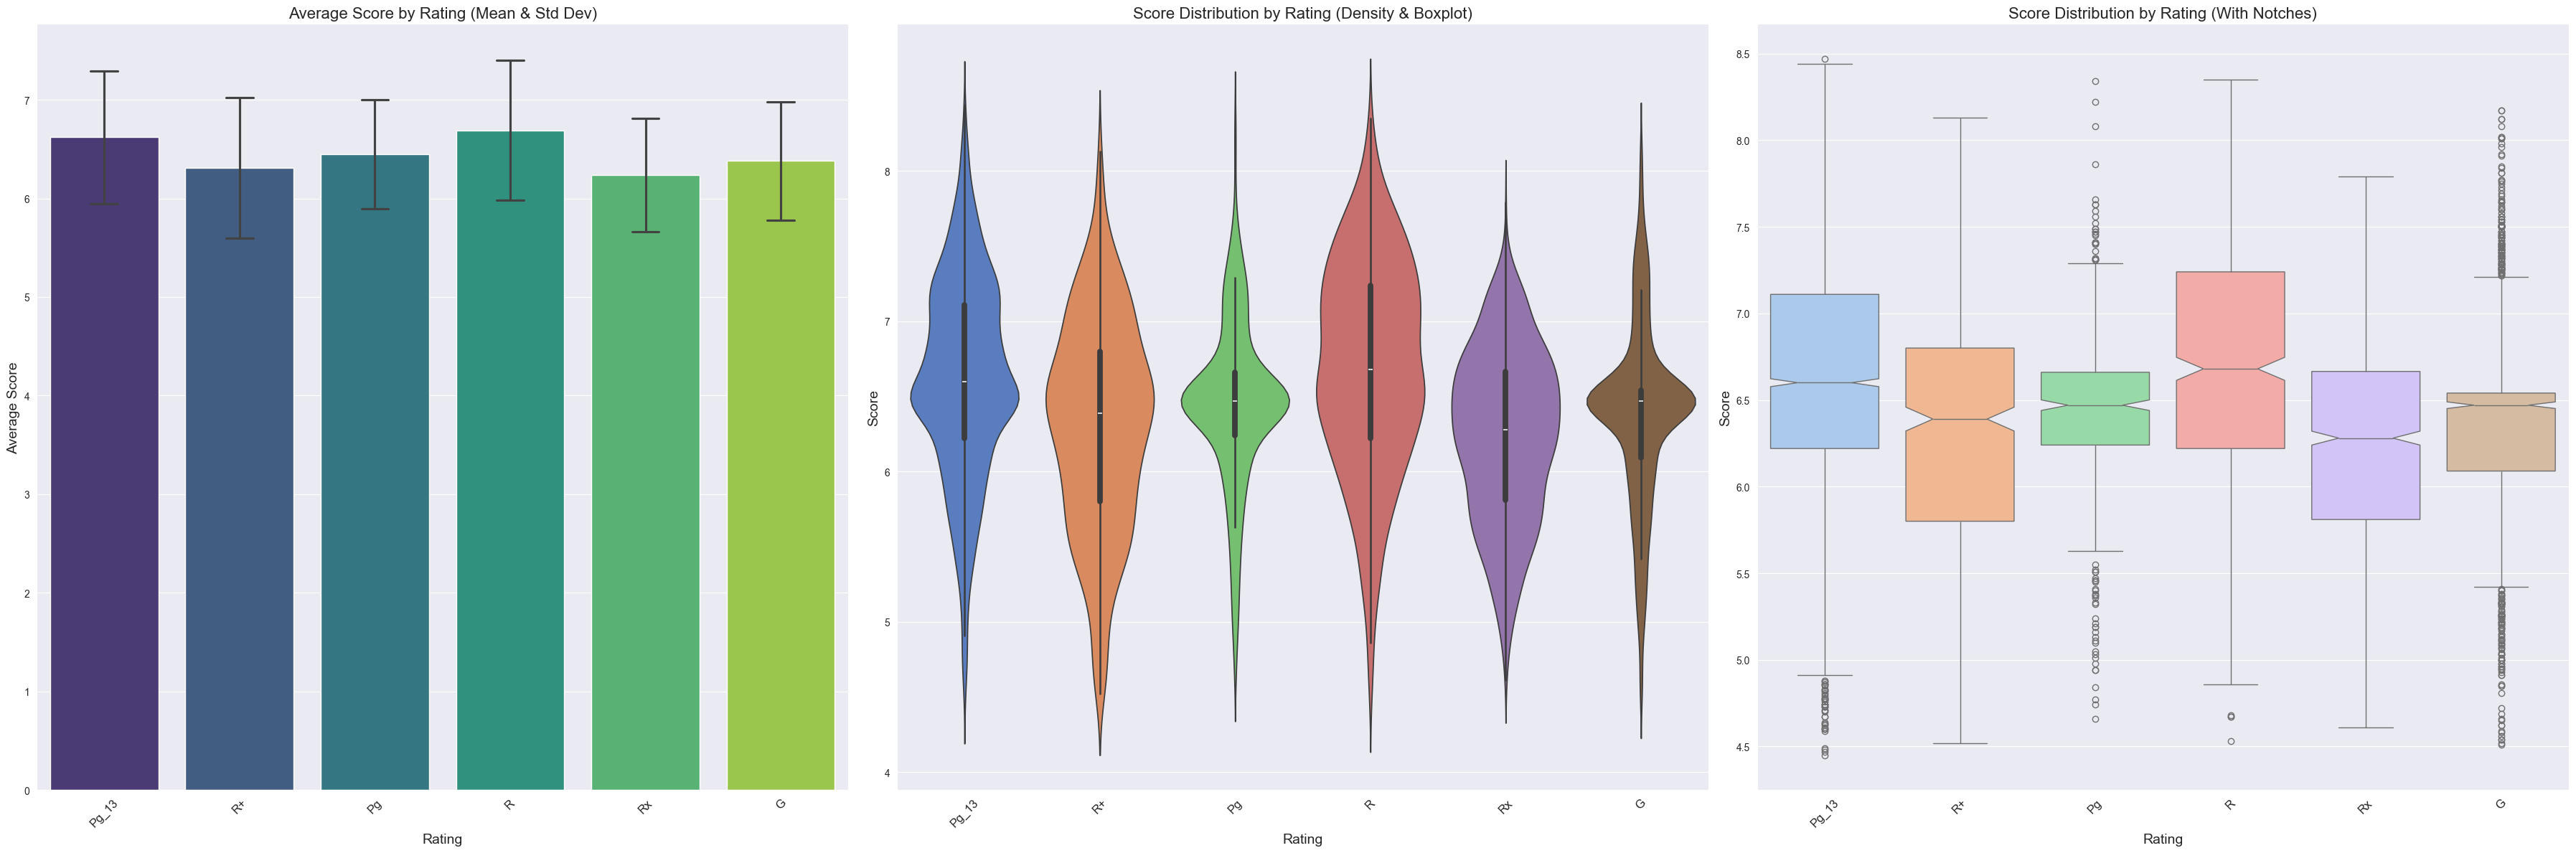

In [213]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set Seaborn style
sns.set_style("darkgrid")

# === Correlation Matrix ===
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(18, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Mask upper triangle for readability
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, square=True,
            cbar_kws={"shrink": 0.75})  # Shrink color bar
plt.title("Correlation Matrix (Highlighting Strong Relationships)", fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(rotation=0, fontsize=14)
plt.show()

# === Scatter Plots: Continuous Variables ===
fig, axes = plt.subplots(1, 2, figsize=(24, 10))

# Scatter Plot: Score vs Members with Trend Line
sns.regplot(x='Score', y='Members', data=df.dropna(subset=['Score', 'Members']), ax=axes[0], scatter_kws={'alpha': 0.5}, line_kws={"color": "red"})
axes[0].set_title("Score vs Members (With Trend Line)", fontsize=16)
axes[0].set_xlabel("Score", fontsize=14)
axes[0].set_ylabel("Members", fontsize=14)

# Scatter Plot: Score vs Votes with Trend Line
sns.regplot(x='Score', y='Votes', data=df.dropna(subset=['Score', 'Votes']), ax=axes[1], scatter_kws={'alpha': 0.5}, line_kws={"color": "red"})
axes[1].set_title("Score vs Votes (With Trend Line)", fontsize=16)
axes[1].set_xlabel("Score", fontsize=14)
axes[1].set_ylabel("Votes", fontsize=14)

plt.tight_layout()
plt.show()

# === Categorical vs Numerical Analysis ===
# Limit `Rating` categories to the top 10
top_ratings = df['Rating'].value_counts().index[:10]
df_filtered = df[df['Rating'].isin(top_ratings)]

fig, axes = plt.subplots(1, 3, figsize=(36, 12))

# Bar Plot: Average Score by Rating (with error bars)
sns.barplot(x='Rating', y='Score', data=df_filtered, ax=axes[0], estimator=np.mean, ci="sd", palette='viridis', capsize=0.2)
axes[0].set_title("Average Score by Rating (Mean & Std Dev)", fontsize=16)
axes[0].set_xlabel("Rating", fontsize=14)
axes[0].set_ylabel("Average Score", fontsize=14)
axes[0].tick_params(axis='x', rotation=45, labelsize=12)

# Violin Plot: Score Distribution by Rating (with inner boxplot)
sns.violinplot(x='Rating', y='Score', data=df_filtered, ax=axes[1], palette='muted', inner="box", scale="count")
axes[1].set_title("Score Distribution by Rating (Density & Boxplot)", fontsize=16)
axes[1].set_xlabel("Rating", fontsize=14)
axes[1].set_ylabel("Score", fontsize=14)
axes[1].tick_params(axis='x', rotation=45, labelsize=12)

# Box Plot: Score by Rating (with notches for median confidence)
sns.boxplot(x='Rating', y='Score', data=df_filtered, ax=axes[2], palette='pastel', notch=True)
axes[2].set_title("Score Distribution by Rating (With Notches)", fontsize=16)
axes[2].set_xlabel("Rating", fontsize=14)
axes[2].set_ylabel("Score", fontsize=14)
axes[2].tick_params(axis='x', rotation=45, labelsize=12)

plt.tight_layout()
plt.show()



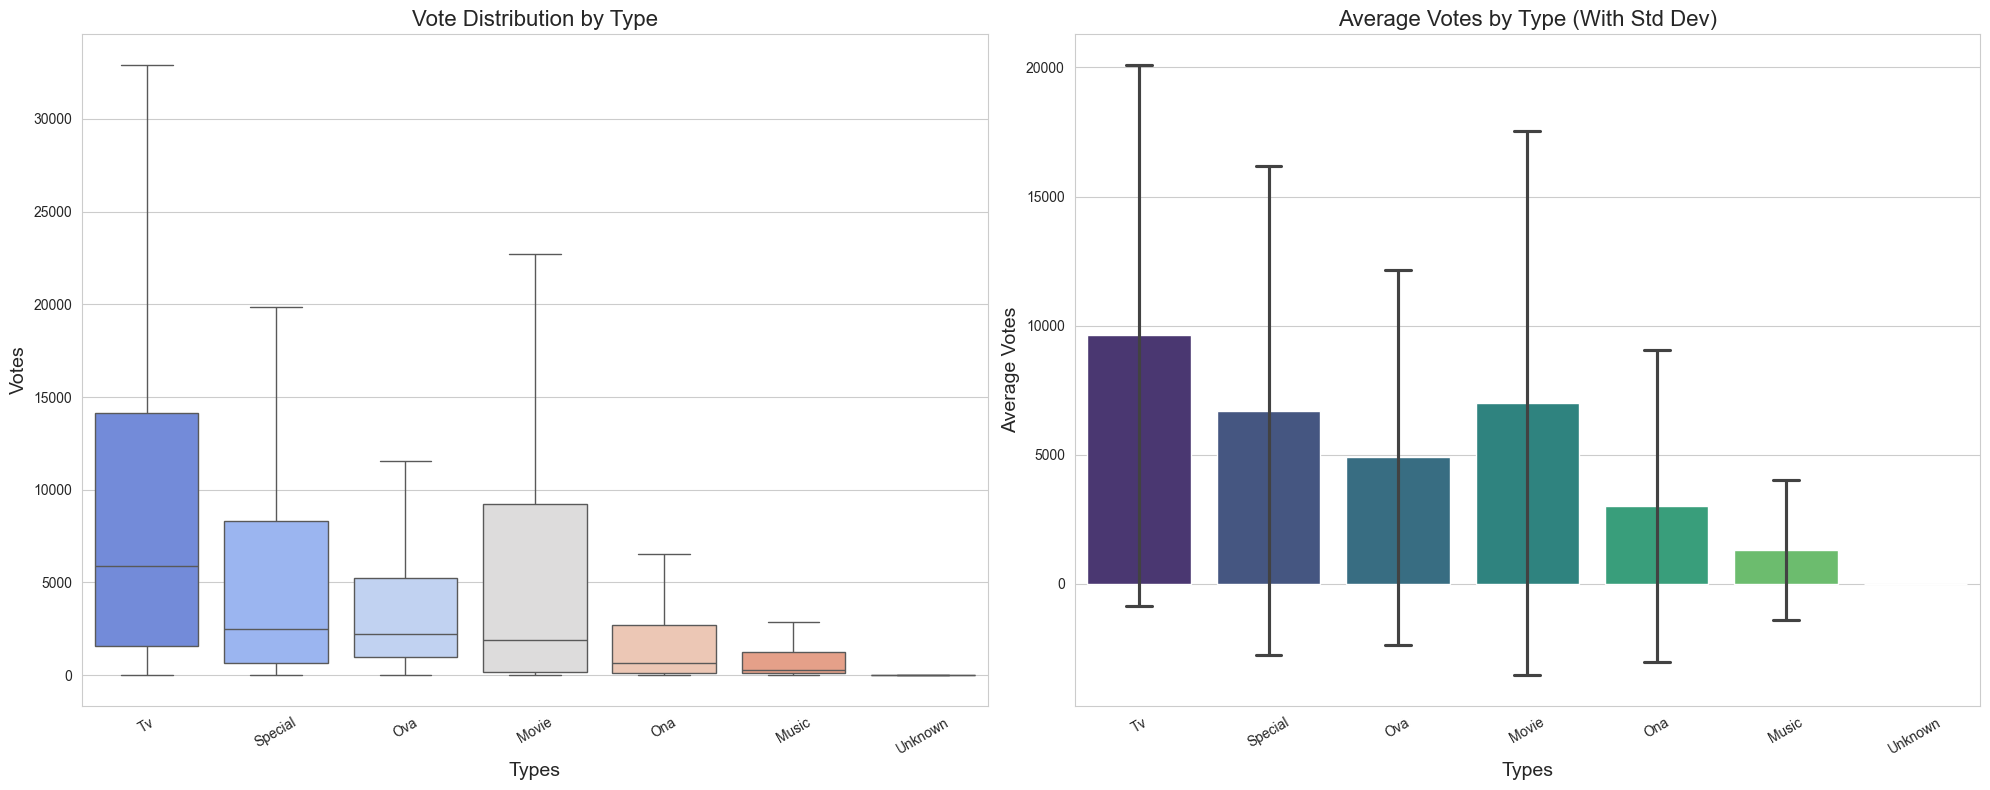

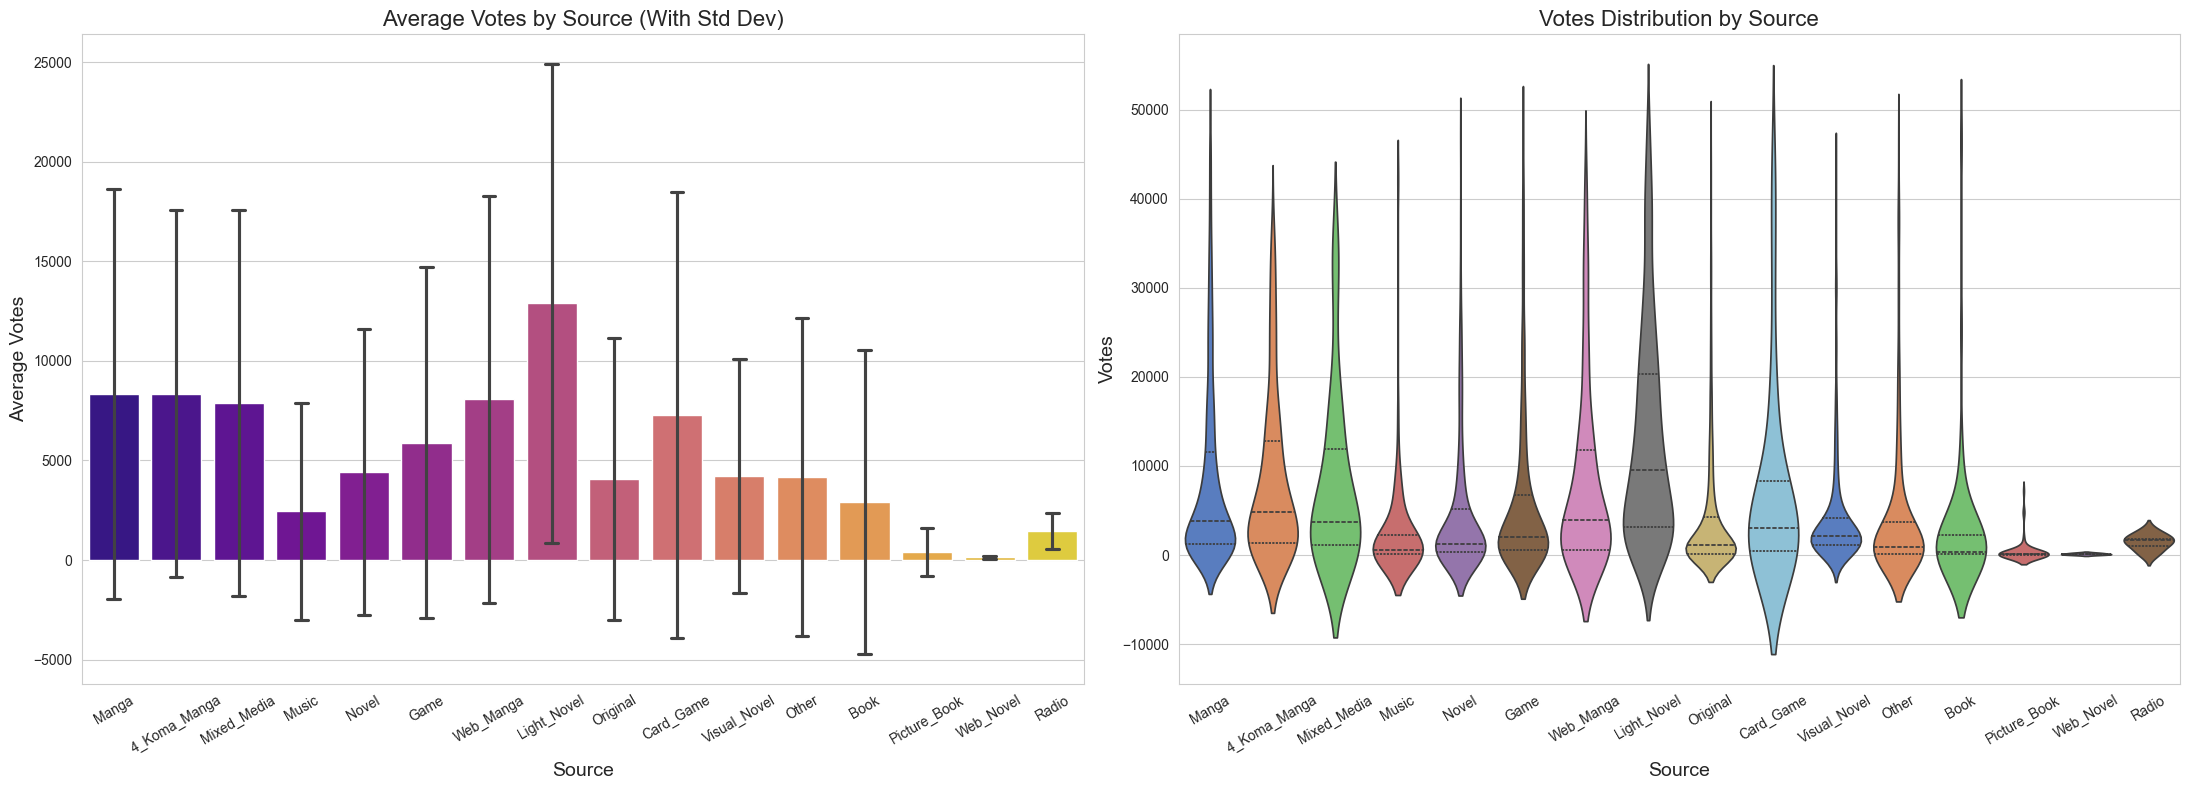

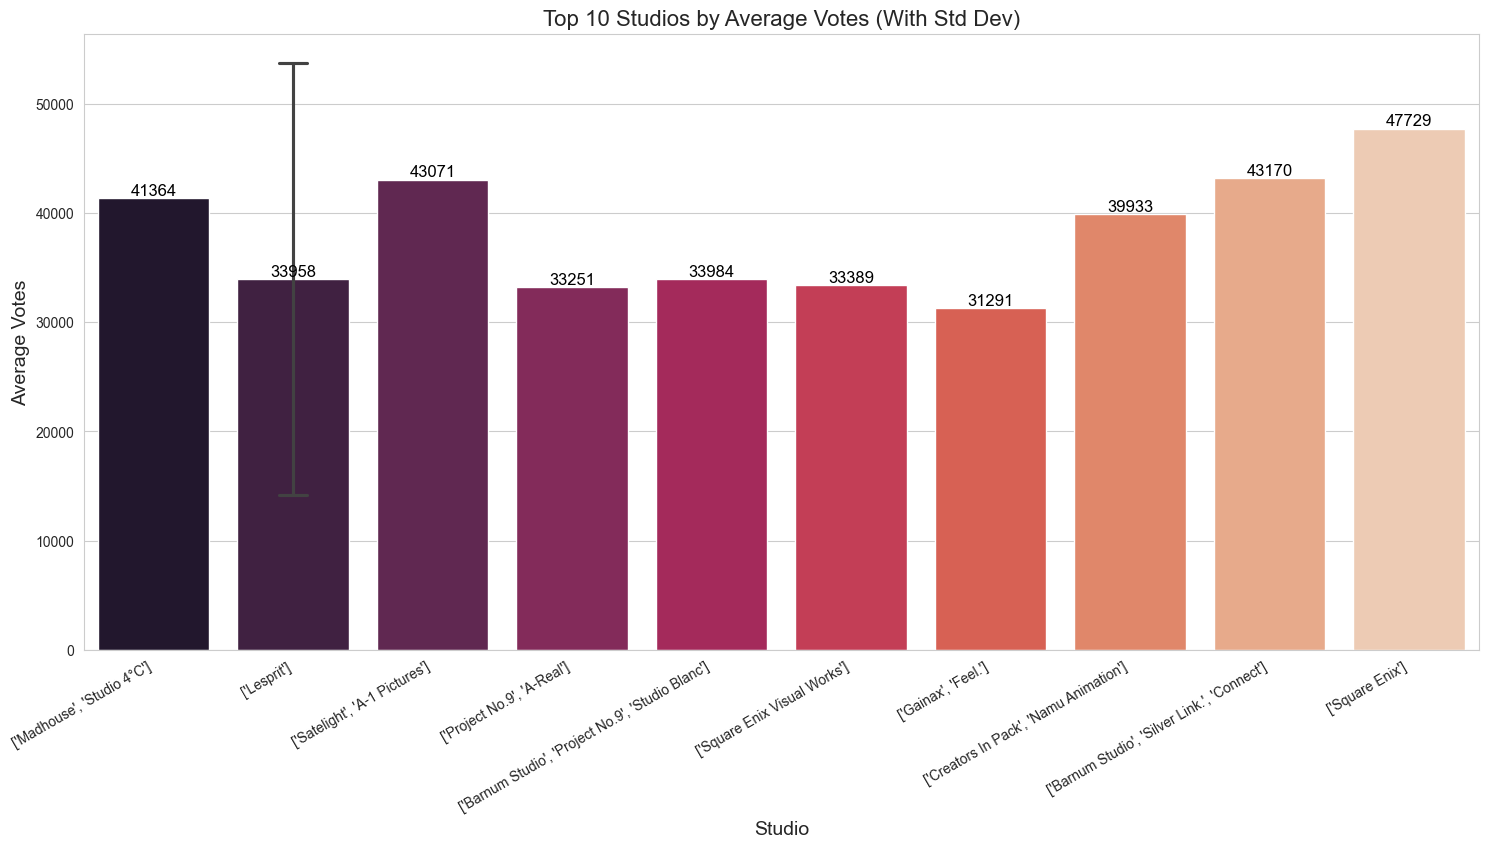

In [214]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set Seaborn style
sns.set_style("whitegrid")

### === 1. Votes vs Type ===
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Boxplot: Distribution of votes by type
sns.boxplot(x='Types', y='Votes', data=df, ax=axes[0], palette='coolwarm', showfliers=False)
axes[0].set_title("Vote Distribution by Type", fontsize=16)
axes[0].set_xlabel("Types", fontsize=14)
axes[0].set_ylabel("Votes", fontsize=14)
axes[0].tick_params(axis='x', rotation=30)

# Barplot: Mean votes per type with standard deviation
sns.barplot(x='Types', y='Votes', data=df, ax=axes[1], palette='viridis', estimator=np.mean, ci="sd", capsize=0.2)
axes[1].set_title("Average Votes by Type (With Std Dev)", fontsize=16)
axes[1].set_xlabel("Types", fontsize=14)
axes[1].set_ylabel("Average Votes", fontsize=14)
axes[1].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()


### === 2. Votes vs Source ===
fig, axes = plt.subplots(1, 2, figsize=(22, 8))

# Barplot: Mean votes by source
sns.barplot(x='Source', y='Votes', data=df, ax=axes[0], palette='plasma', estimator=np.mean, ci="sd", capsize=0.2)
axes[0].set_title("Average Votes by Source (With Std Dev)", fontsize=16)
axes[0].set_xlabel("Source", fontsize=14)
axes[0].set_ylabel("Average Votes", fontsize=14)
axes[0].tick_params(axis='x', rotation=30)

# Violin Plot: Distribution of votes by source
sns.violinplot(x='Source', y='Votes', data=df, ax=axes[1], palette='muted', inner="quartile")
axes[1].set_title("Votes Distribution by Source", fontsize=16)
axes[1].set_xlabel("Source", fontsize=14)
axes[1].set_ylabel("Votes", fontsize=14)
axes[1].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

### === 4. Votes vs Studio ===
# Select Top 10 Studios by Average Votes
top_studios = df.groupby("Studios")["Votes"].mean().nlargest(10).index
df_filtered = df[df["Studios"].isin(top_studios)]

plt.figure(figsize=(18, 8))
ax = sns.barplot(x="Studios", y="Votes", data=df_filtered, palette="rocket", estimator=np.mean, ci="sd", capsize=0.2)
plt.title("Top 10 Studios by Average Votes (With Std Dev)", fontsize=16)
plt.xlabel("Studio", fontsize=14)
plt.ylabel("Average Votes", fontsize=14)
plt.xticks(rotation=30, ha="right")

# Annotate count values
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha="center", va="bottom", fontsize=12, color="black")

plt.show()


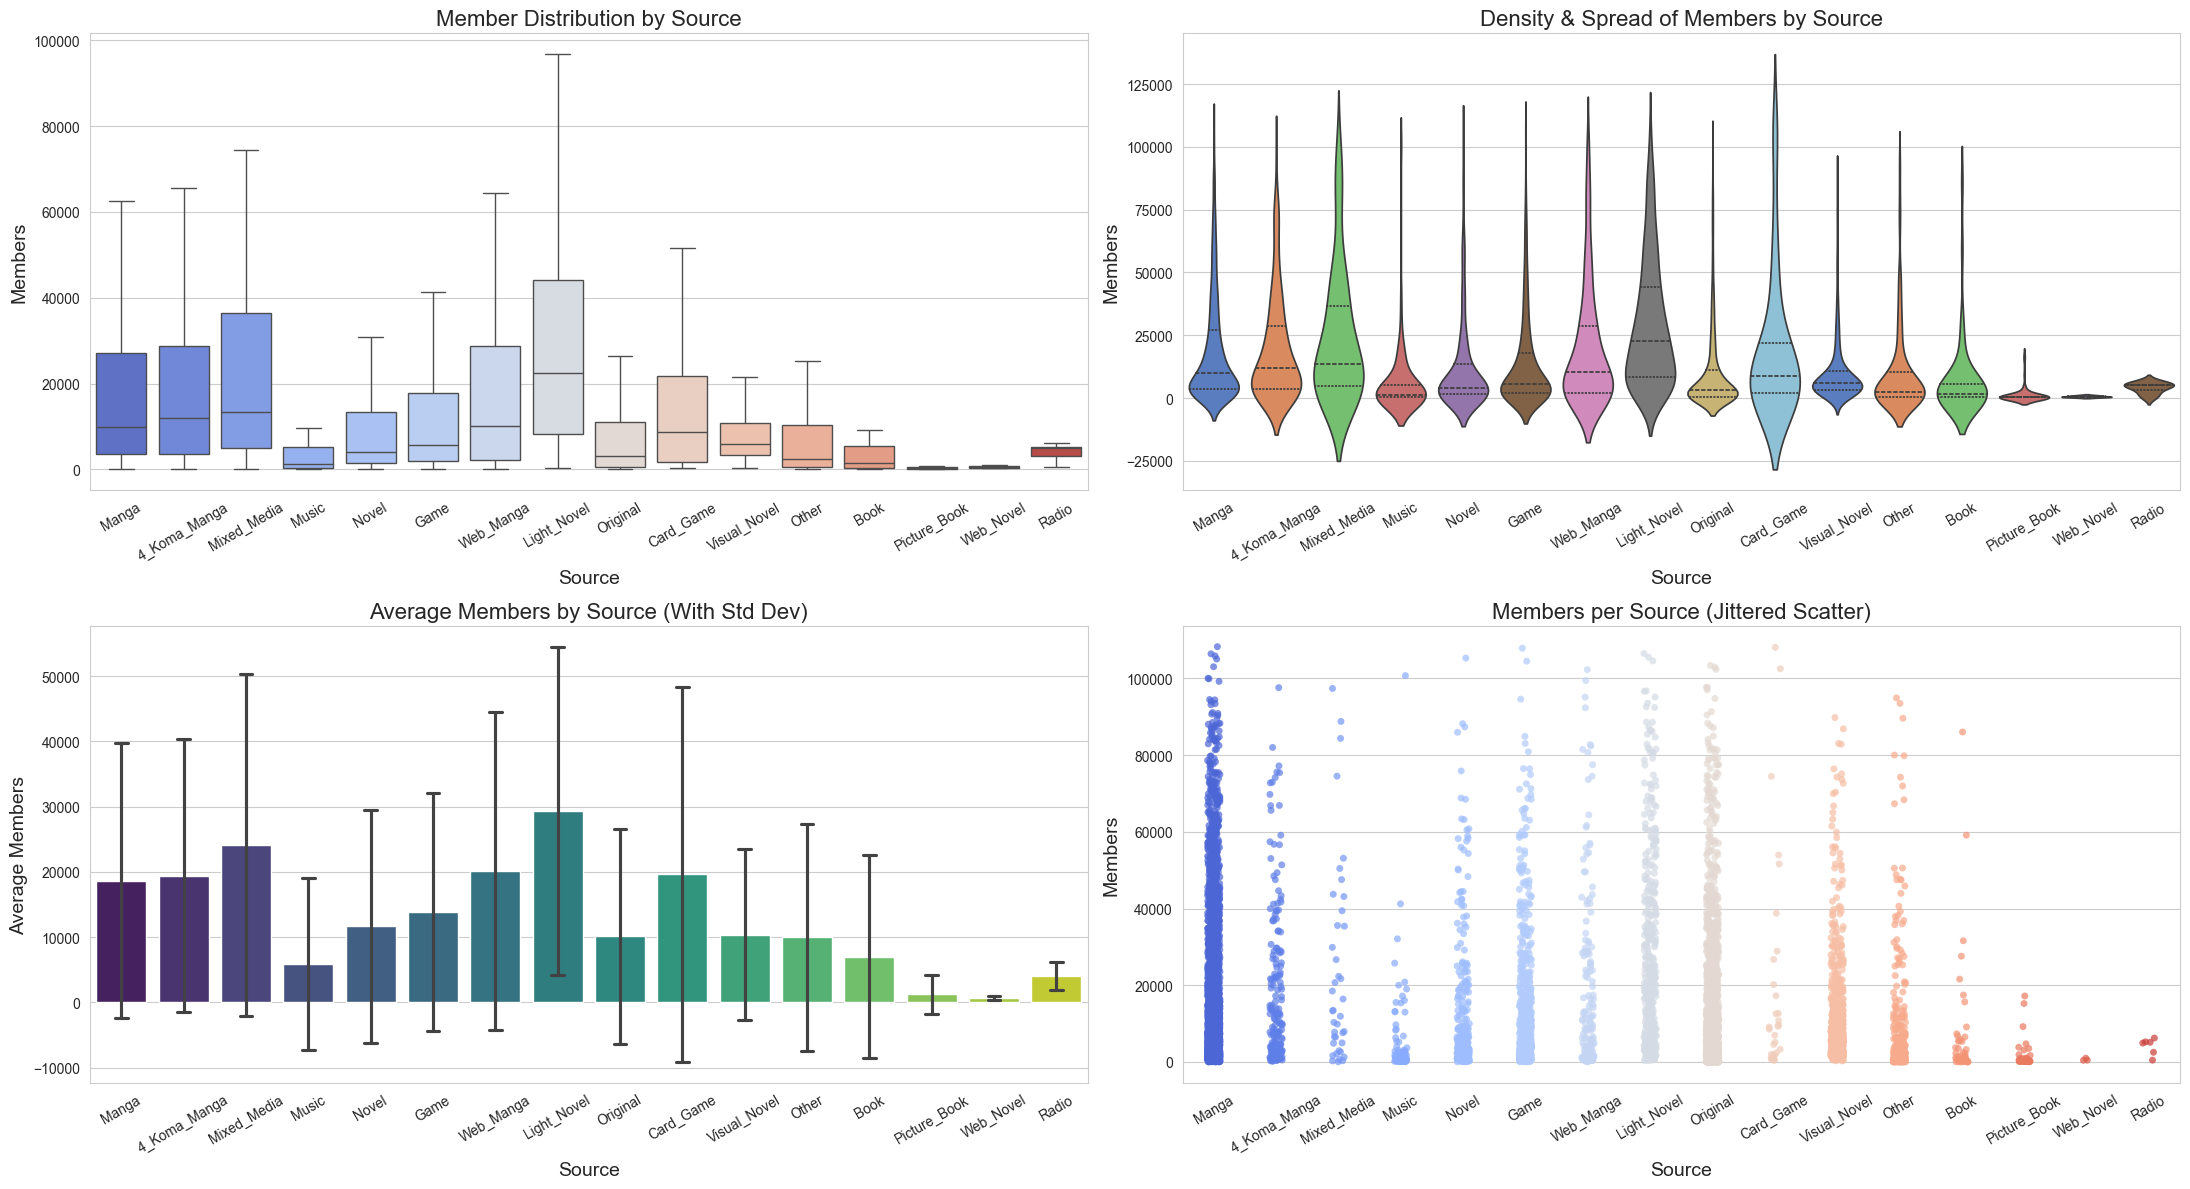

In [215]:
# Bivariate Analysis

# Members(numerical) vs Source(categorical)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set Seaborn style
sns.set_style("whitegrid")

### === Members vs Source ===
fig, axes = plt.subplots(2, 2, figsize=(22, 12))

# 1. Boxplot: Distribution of Members by Source
sns.boxplot(x='Source', y='Members', data=df, ax=axes[0, 0], palette='coolwarm', showfliers=False)
axes[0, 0].set_title("Member Distribution by Source", fontsize=16)
axes[0, 0].set_xlabel("Source", fontsize=14)
axes[0, 0].set_ylabel("Members", fontsize=14)
axes[0, 0].tick_params(axis='x', rotation=30)

# 2. Violin Plot: Density of Members per Source
sns.violinplot(x='Source', y='Members', data=df, ax=axes[0, 1], palette='muted', inner="quartile")
axes[0, 1].set_title("Density & Spread of Members by Source", fontsize=16)
axes[0, 1].set_xlabel("Source", fontsize=14)
axes[0, 1].set_ylabel("Members", fontsize=14)
axes[0, 1].tick_params(axis='x', rotation=30)

# 3. Bar Plot: Mean & Standard Deviation of Members per Source
sns.barplot(x='Source', y='Members', data=df, ax=axes[1, 0], palette='viridis', estimator=np.mean, ci="sd", capsize=0.2)
axes[1, 0].set_title("Average Members by Source (With Std Dev)", fontsize=16)
axes[1, 0].set_xlabel("Source", fontsize=14)
axes[1, 0].set_ylabel("Average Members", fontsize=14)
axes[1, 0].tick_params(axis='x', rotation=30)

# 4. Strip Plot: Individual Data Points (Jittered)
sns.stripplot(x='Source', y='Members', data=df, ax=axes[1, 1], palette='coolwarm', jitter=True, alpha=0.7)
axes[1, 1].set_title("Members per Source (Jittered Scatter)", fontsize=16)
axes[1, 1].set_xlabel("Source", fontsize=14)
axes[1, 1].set_ylabel("Members", fontsize=14)
axes[1, 1].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()


In [216]:
import plotly.figure_factory as ff
import pandas as pd
import numpy as np

df_filtered = df.dropna(subset=['Score', 'Types'])  # Ensure 'Score' & 'Types' exist

# Filter out 'Types' categories with insufficient data
min_elements = 2  # Minimum required elements per category
filtered_types = df_filtered.groupby('Types').filter(lambda x: len(x) >= min_elements)

# Prepare data for KDE plot
types = filtered_types['Types'].unique()
hist_data = [filtered_types[filtered_types['Types'] == t]['Score'].values for t in types]

# Check if there is sufficient data to plot
if all(len(data) > 1 for data in hist_data):
    # Create KDE plot
    fig = ff.create_distplot(hist_data, types, show_hist=False, show_rug=False)

    fig.update_layout(
        title="KDE Plot of 'Score' by 'Types'",
        xaxis_title="Score",
        yaxis_title="Density",
        legend_title="Types",
        template="plotly_dark"  # Optional: Dark mode styling
    )

    fig.show()

# Multivariate Analysis (Multiple Variables Exploration)  

## Overview  
Multivariate analysis examines the interactions between multiple variables simultaneously to uncover deeper insights and patterns.  

## Key Techniques  

### **1. Pair Plots (Relationships Across Multiple Variables)**  
- Use **Pair Plots** to visualize pairwise relationships between numerical variables.   

### **2. Correlation Heatmaps**  
- **Heatmaps** provide a color-coded representation of variable relationships.  

### **3. Grouped Comparisons (Feature Interactions)**  
- ** Grouped Bar Charts** – Compare numerical values across multiple categorical groups.  
- ** Box Plots & Violin Plots** – Show distributions across multiple variables.  
- ** Multivariate Regression** – Analyze the combined effects of multiple independent variables on a dependent variable.  

>  **Tip:** Utilize `seaborn`, `matplotlib`, and `statsmodels` for advanced multivariate exploration!  



<Figure size 1200x1000 with 0 Axes>

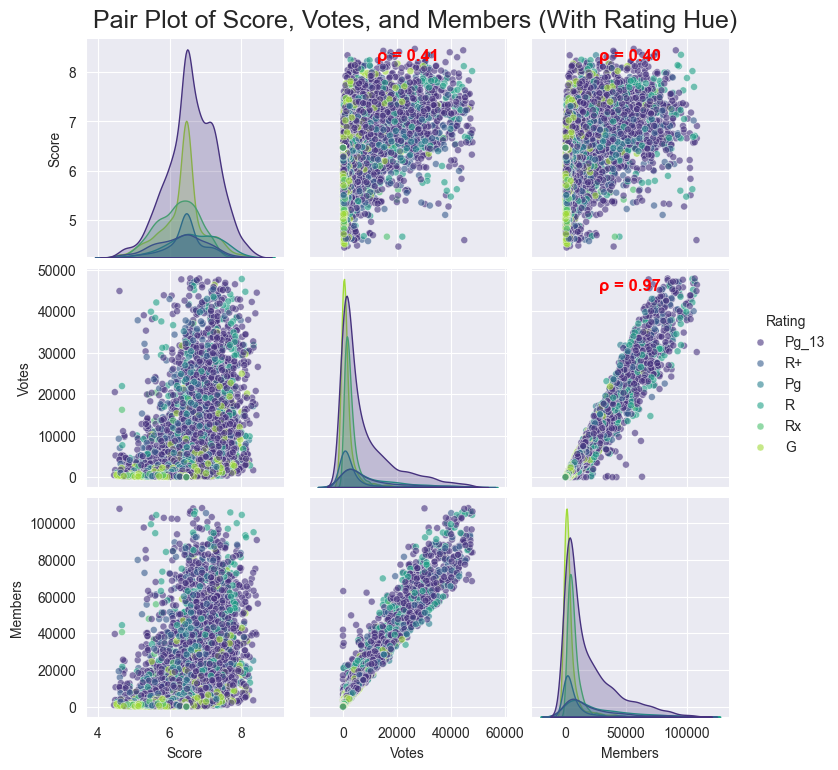

In [217]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set Seaborn style
sns.set_style("darkgrid")

# Select numerical features for the pair plot
pairplot_features = ['Score', 'Votes', 'Members']

# Choose a categorical variable for hue (e.g., Rating or Types)
hue_category = "Rating"  # Change to 'Types' if needed

# Compute correlation matrix for reference
corr_matrix = df[pairplot_features].corr()

# Create the Pair Plot
plt.figure(figsize=(12, 10))
pair_plot = sns.pairplot(df, vars=pairplot_features, hue=hue_category, palette="viridis",
                         diag_kind='kde', plot_kws={'alpha': 0.6, 's': 25}, diag_kws={'shade': True})

# Add correlation coefficients on the upper triangle
for i, row in enumerate(pairplot_features):
    for j, col in enumerate(pairplot_features):
        if i < j:  # Only upper triangle
            corr_value = corr_matrix.loc[row, col]
            ax = pair_plot.axes[i, j]
            ax.annotate(f"ρ = {corr_value:.2f}", xy=(0.5, 0.9), xycoords="axes fraction",
                        ha="center", fontsize=12, fontweight='bold', color='red')

# Formatting
plt.suptitle("Pair Plot of Score, Votes, and Members (With Rating Hue)", fontsize=18, y=1.02)
plt.show()

<Figure size 1200x1000 with 0 Axes>

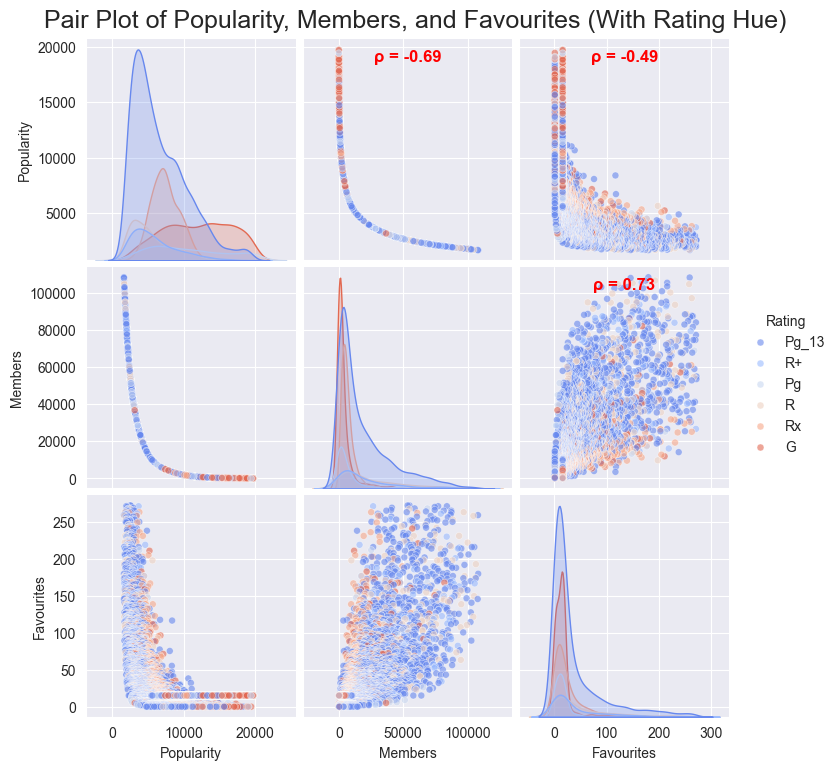

In [218]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set Seaborn style
sns.set_style("darkgrid")

# Select numerical features for the pair plot
pairplot_features = ['Popularity', 'Members', 'Favourites']

# Choose a categorical variable for hue (e.g., Rating or Types)
hue_category = "Rating"  # Change to 'Types' if needed

# Compute correlation matrix for reference
corr_matrix = df[pairplot_features].corr()

# Create the Pair Plot
plt.figure(figsize=(12, 10))
pair_plot = sns.pairplot(df, vars=pairplot_features, hue=hue_category, palette="coolwarm",
                         diag_kind='kde', plot_kws={'alpha': 0.6, 's': 25}, diag_kws={'shade': True})

# Add correlation coefficients on the upper triangle
for i, row in enumerate(pairplot_features):
    for j, col in enumerate(pairplot_features):
        if i < j:  # Only upper triangle
            corr_value = corr_matrix.loc[row, col]
            ax = pair_plot.axes[i, j]
            ax.annotate(f"ρ = {corr_value:.2f}", xy=(0.5, 0.9), xycoords="axes fraction",
                        ha="center", fontsize=12, fontweight='bold', color='red')

# Formatting
plt.suptitle("Pair Plot of Popularity, Members, and Favourites (With Rating Hue)", fontsize=18, y=1.02)
plt.show()


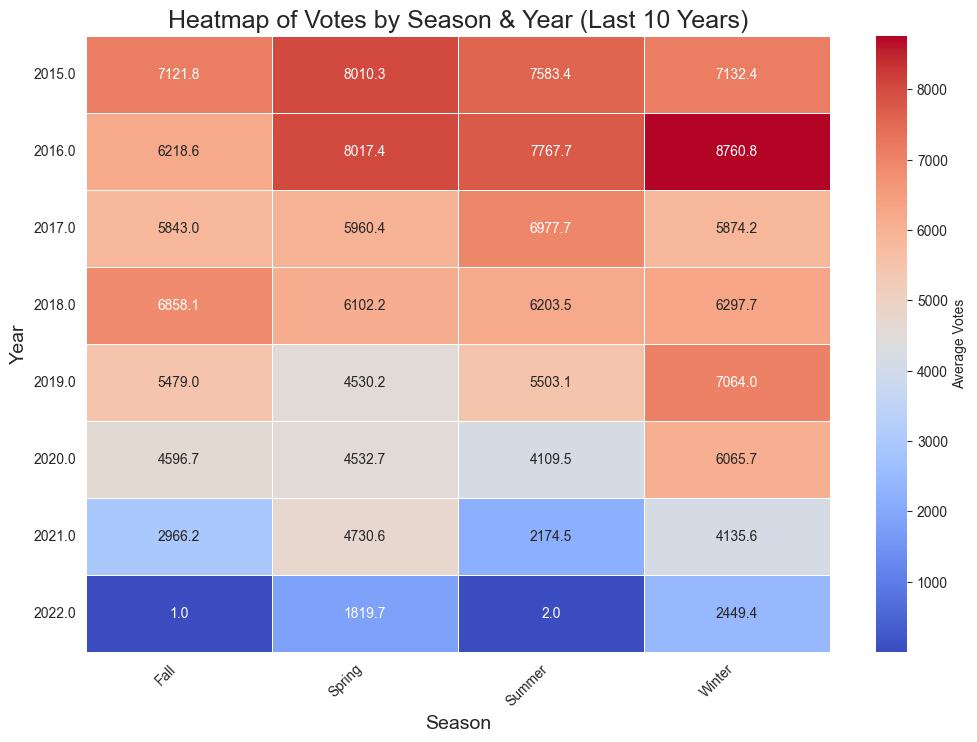

In [219]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set Seaborn style
sns.set_style("whitegrid")

# Define the last 10 years dynamically (assuming current year is 2025)
current_year = 2025
last_10_years = list(range(current_year - 10, current_year))

# Filter data for the last 10 years and exclude missing values
df_filtered = df.dropna(subset=["Year", "Season", "Votes"])
df_filtered = df_filtered[df_filtered["Year"].isin(last_10_years)]

# Create a pivot table with Season as X-axis, Year as Y-axis, and Votes as the value
heatmap_data = df_filtered.pivot_table(index="Year", columns="Season", values="Votes", aggfunc=np.mean)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".1f", linewidths=0.5, cbar_kws={"label": "Average Votes"})

# Formatting
plt.title("Heatmap of Votes by Season & Year (Last 10 Years)", fontsize=18)
plt.xlabel("Season", fontsize=14)
plt.ylabel("Year", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.show()


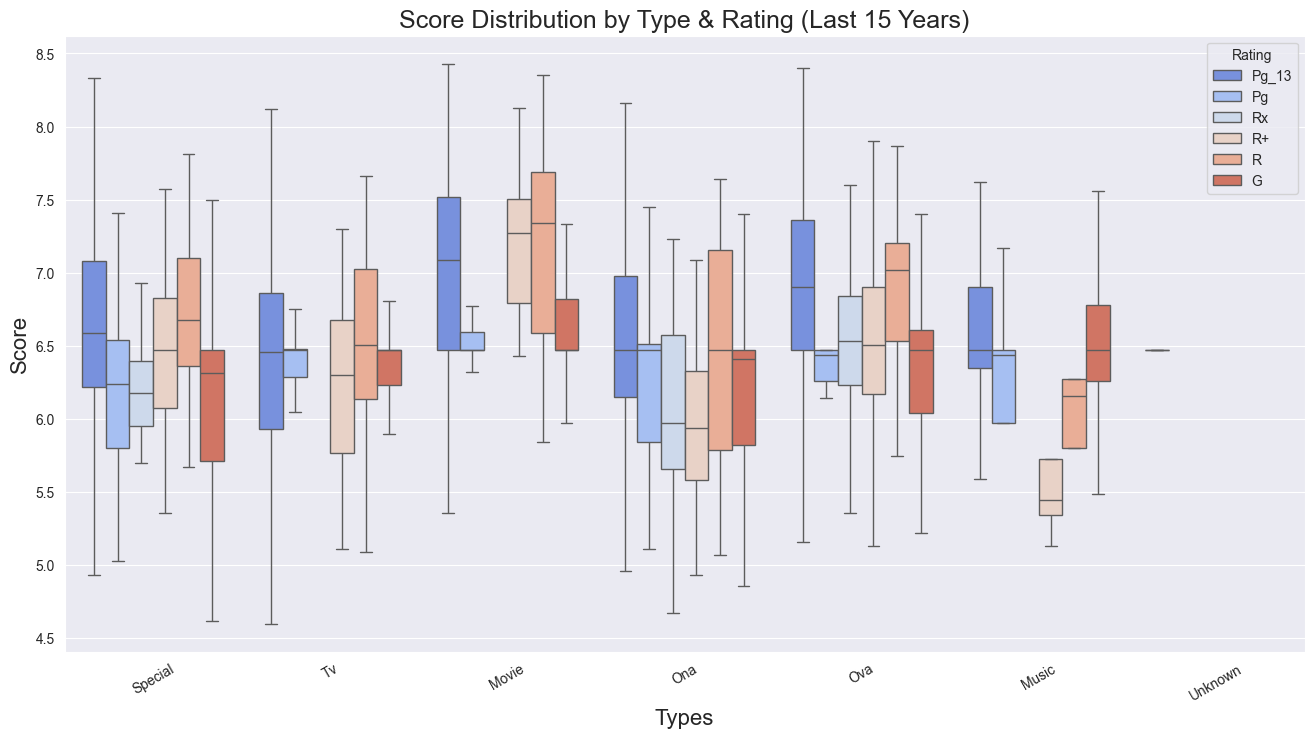

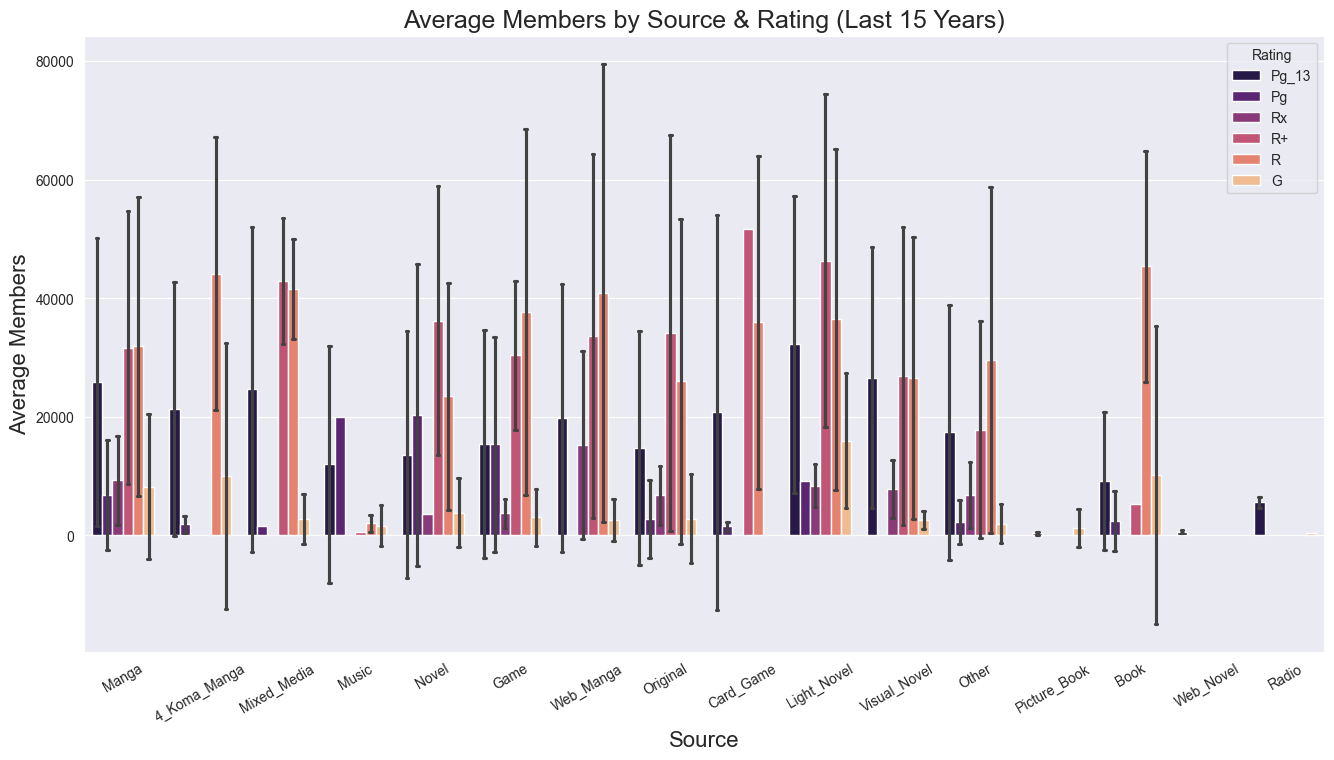

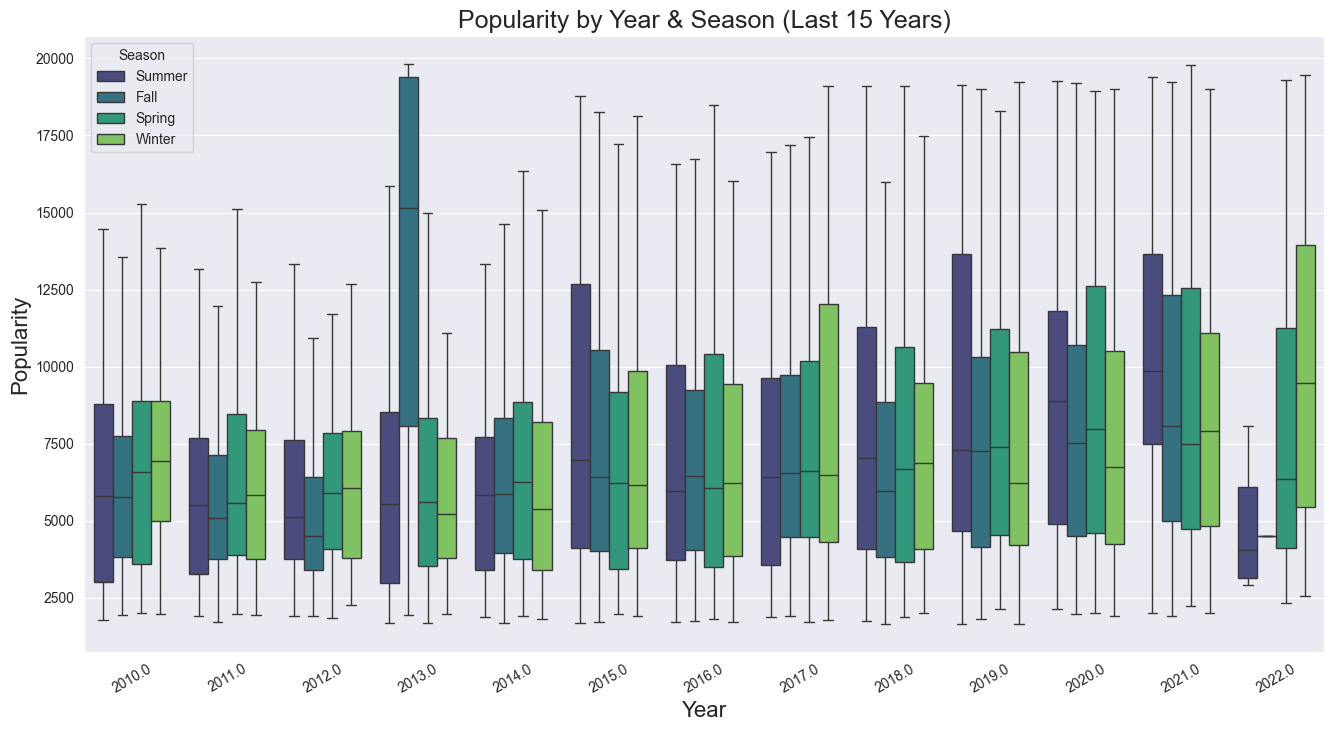

In [220]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set Seaborn style
sns.set_style("darkgrid")

# Define the last 15 years dynamically
current_year = 2025
last_15_years = list(range(current_year - 15, current_year))

# Filter the data for the last 15 years
df_filtered = df[df["Year"].isin(last_15_years)]

# === 1. Score vs Type & Rating (Boxplot) ===
plt.figure(figsize=(16, 8))
sns.boxplot(x='Types', y='Score', hue='Rating', data=df_filtered, palette='coolwarm', showfliers=False, dodge=True)
plt.title("Score Distribution by Type & Rating (Last 15 Years)", fontsize=18)
plt.xlabel("Types", fontsize=16)
plt.ylabel("Score", fontsize=16)
plt.xticks(rotation=30)
plt.legend(title="Rating")
plt.show()

# === 2. Members vs Source & Rating (Bar Plot) ===
plt.figure(figsize=(16, 8))
sns.barplot(x='Source', y='Members', hue='Rating', data=df_filtered, palette='magma', estimator=np.mean, ci="sd", capsize=0.2, dodge=True)
plt.title("Average Members by Source & Rating (Last 15 Years)", fontsize=18)
plt.xlabel("Source", fontsize=16)
plt.ylabel("Average Members", fontsize=16)
plt.xticks(rotation=30)
plt.legend(title="Rating")
plt.show()

# === 3. Popularity vs Year & Season (Boxplot) ===
plt.figure(figsize=(16, 8))
sns.boxplot(x='Year', y='Popularity', hue='Season', data=df_filtered, palette='viridis', showfliers=False, dodge=True)
plt.title("Popularity by Year & Season (Last 15 Years)", fontsize=18)
plt.xlabel("Year", fontsize=16)
plt.ylabel("Popularity", fontsize=16)
plt.xticks(rotation=30)
plt.legend(title="Season")
plt.show()


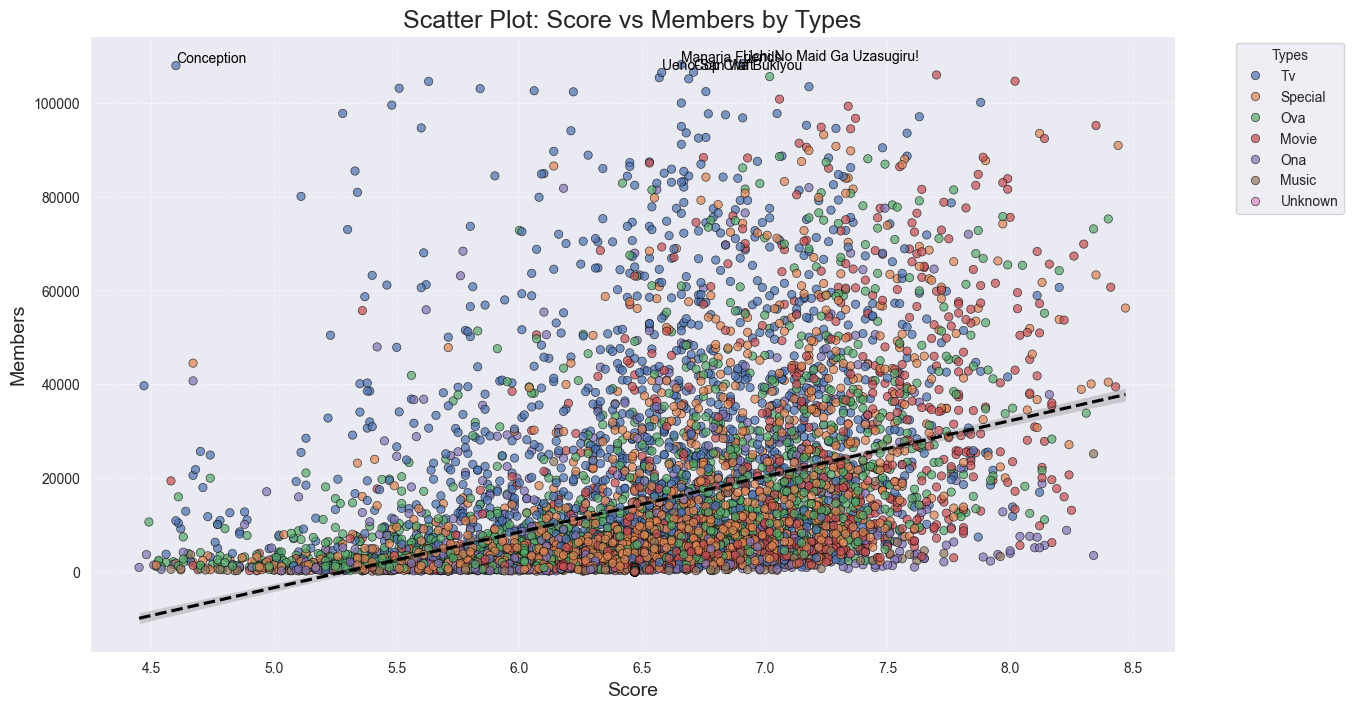

In [221]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set Seaborn style
sns.set_style("darkgrid")

# Create Scatter Plot (without Popularity scaling)
plt.figure(figsize=(14, 8))
scatter = sns.scatterplot(x='Score', y='Members', hue='Types', data=df, 
                          palette='deep', alpha=0.7, edgecolor="black", linewidth=0.5)

# Add Trend Line
sns.regplot(x='Score', y='Members', data=df, scatter=False, color='black', line_kws={'linestyle': 'dashed'})

# Annotate Top 5 Most Popular Anime (based on Members)
top_anime = df.nlargest(5, 'Members')
for i, row in top_anime.iterrows():
    plt.text(row['Score'], row['Members'], row['Title'], fontsize=10, ha='left', va='bottom', color='black')

# Title & Labels
plt.title("Scatter Plot: Score vs Members by Types", fontsize=18)
plt.xlabel("Score", fontsize=14)
plt.ylabel("Members", fontsize=14)
plt.legend(title="Types", bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside for clarity
plt.grid(True, linestyle="--", alpha=0.5)

# Show Plot
plt.show()


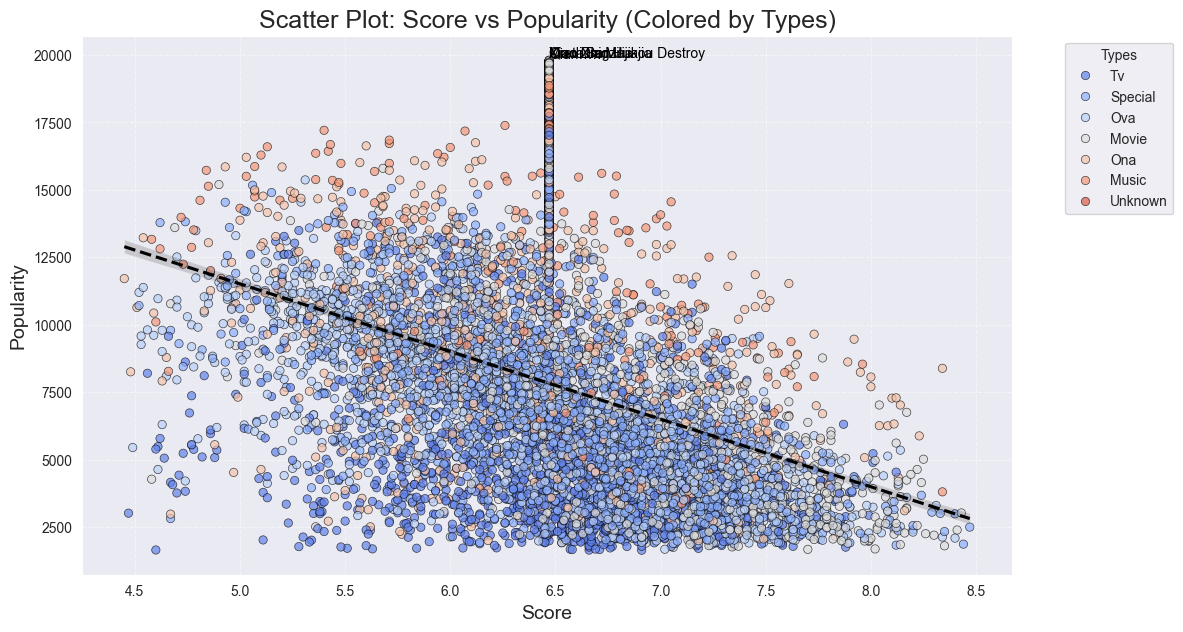

In [222]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set Seaborn style
sns.set_style("darkgrid")

# Create Scatter Plot
plt.figure(figsize=(12, 7))
scatter = sns.scatterplot(x='Score', y='Popularity', hue='Types', data=df, 
                          palette='coolwarm', alpha=0.7, edgecolor="black", linewidth=0.5)

# Add Trend Line
sns.regplot(x='Score', y='Popularity', data=df, scatter=False, color='black', line_kws={'linestyle': 'dashed'})

# Annotate Top 5 Most Popular Anime
top_anime = df.nlargest(5, 'Popularity')
for i, row in top_anime.iterrows():
    plt.text(row['Score'], row['Popularity'], row['Title'], fontsize=10, ha='left', va='bottom', color='black')

# Title & Labels
plt.title("Scatter Plot: Score vs Popularity (Colored by Types)", fontsize=18)
plt.xlabel("Score", fontsize=14)
plt.ylabel("Popularity", fontsize=14)
plt.legend(title="Types", bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside for clarity
plt.grid(True, linestyle="--", alpha=0.5)

# Show Plot
plt.show()

C:\Users\ankit\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 9734 (\N{WHITE STAR}) missing from font(s) Arial.



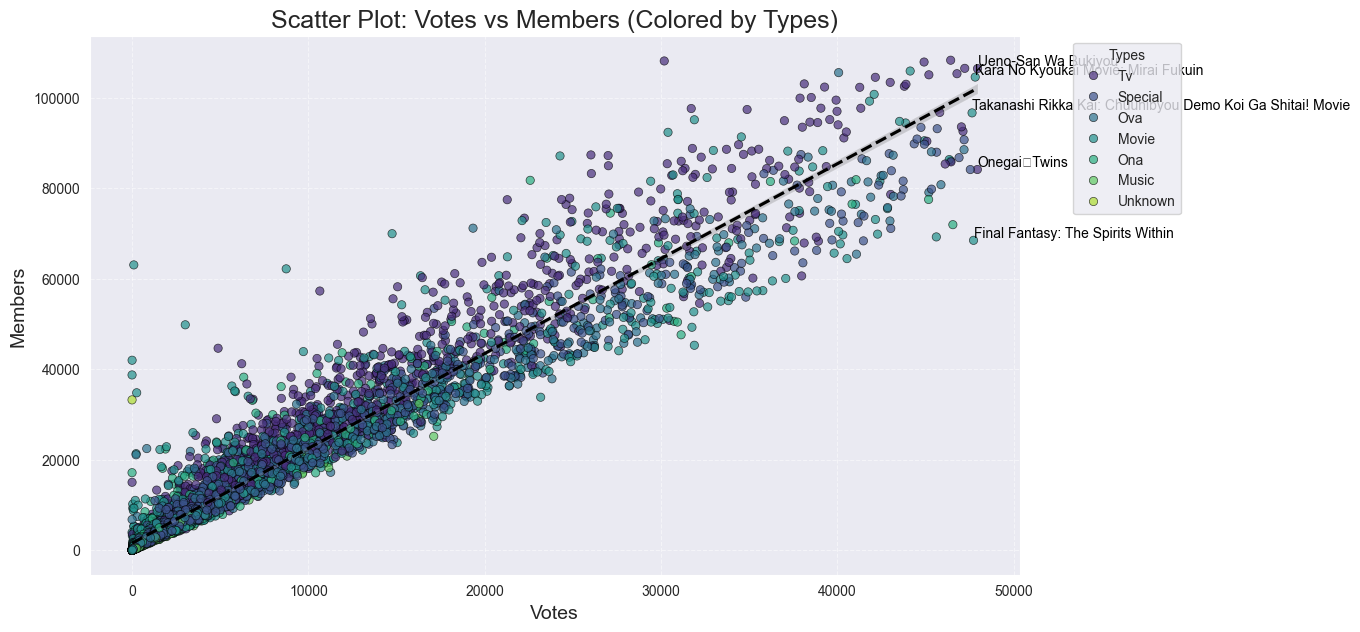

In [223]:
# Multivariate Analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set Seaborn style
sns.set_style("darkgrid")

# Create Scatter Plot
plt.figure(figsize=(12, 7))
scatter = sns.scatterplot(x='Votes', y='Members', hue='Types', data=df, 
                          palette='viridis', alpha=0.7, edgecolor="black", linewidth=0.5)

# Add Trend Line
sns.regplot(x='Votes', y='Members', data=df, scatter=False, color='black', line_kws={'linestyle': 'dashed'})

# Annotate Top 5 Most Voted Anime
top_anime = df.nlargest(5, 'Votes')
for i, row in top_anime.iterrows():
    plt.text(row['Votes'], row['Members'], row['Title'], fontsize=10, ha='left', va='bottom', color='black')

# Title & Labels
plt.title("Scatter Plot: Votes vs Members (Colored by Types)", fontsize=18)
plt.xlabel("Votes", fontsize=14)
plt.ylabel("Members", fontsize=14)
plt.legend(title="Types", bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside for clarity
plt.grid(True, linestyle="--", alpha=0.5)

# Show Plot
plt.show()